In [2]:
%cd ..
import sys 
import os 

sys.path.append("/home/pwilson/projects/aip-medilab/pwilson/medAI")

/project/6106383/pwilson/medAI/projects/prostnfound


In [3]:
from medAI.datasets.optimum.utils import get_cleaned_ua_metadata_table

import pandas as pd
ai_model_outputs = pd.read_csv('/home/pwilson/projects/aip-medilab/pwilson/medAI/logs/pnf_old_logs/test/prostnfound_plus_final/optimum/metrics_by_core.csv', index_col=0)

columns = ['average_needle_heatmap_value', 'image_level_cancer_logits', 'involvement']

ai_model_outputs = ai_model_outputs.set_index('core_id')[columns]

table = get_cleaned_ua_metadata_table(filter_has_primus=True)
table = table.join(ai_model_outputs, how='left')
table = table.loc[~table[columns[0]].isna()]

table['has_pirads'] = ~table['PI-RADS'].isna()
table.groupby('grade_group').has_pirads.value_counts()

max_grade = table.groupby('patient_id')['grade_group'].agg('max')
max_grade
# map max grade back to table
table = table.join(max_grade, on='patient_id', rsuffix='_max')
table

/home/pwilson/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/pwilson/.venv/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


,center,patient_id,isBiopsy,isFusionVu,hasFusionVuOverlay,bimg_path,cine_number,length,heightMm,heightPixel,...,PATH ID,case_path,age,psa,study_arm,average_needle_heatmap_value,image_level_cancer_logits,involvement,has_pirads,grade_group_max
core_id,,,,,,,,,,,,,,,,,,,,,
UA-003-005,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,1.1,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.721861,0.517930,0.50,False,3.0
UA-003-006,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,962.0,...,1.2,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.352760,0.421996,0.30,False,3.0
UA-003-007,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,7.0,60.0,28.0,962.0,...,1.3,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.580911,0.490570,0.30,False,3.0
UA-003-008,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,2.1,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.531472,0.388130,0.40,True,3.0
UA-003-009,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,2.2,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.762613,0.512172,0.50,True,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UA-160-008,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,LMA,UA-160,68.0,5.9,Arm3-MicroUS-MRI,0.184895,0.167181,0.45,False,2.0
UA-160-009,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,LLM,UA-160,68.0,5.9,Arm3-MicroUS-MRI,0.079140,0.070105,0.05,False,2.0
UA-160-010,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,10.0,60.0,28.0,962.0,...,LMM,UA-160,68.0,5.9,Arm3-MicroUS-MRI,0.071826,0.085328,0.35,False,2.0


Text(0, 0.5, 'Number of Cores')

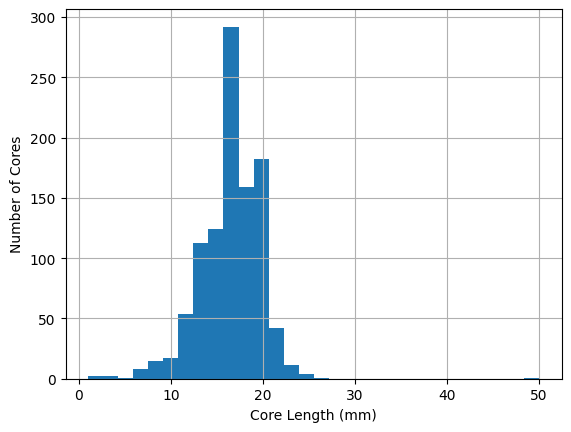

In [9]:
from matplotlib import pyplot as plt

def _convert_core_length(s): 
    try: 
        return float(s)
    except: 
        return None

table['Core Length'] = table['Core Length'].map(_convert_core_length)
table['Core Length'].hist(bins=30)
plt.xlabel('Core Length (mm)')
plt.ylabel('Number of Cores')

In [25]:
def _cancer_type(grade): 
    if grade == 0: 
        return 'Benign'
    elif grade in [1, 2]:
        return 'Low Grade'
    else:
        return 'High Grade'

table = get_cleaned_ua_metadata_table(filter_has_primus=False)
table['cancer_type'] = table['grade_group'].map(_cancer_type)
print(table['cancer_type'].value_counts())
print(table['cancer_type'].value_counts(normalize=True))
print(len(table))


cancer_type
Benign        732
Low Grade     274
High Grade    118
Name: count, dtype: int64
cancer_type
Benign        0.651246
Low Grade     0.243772
High Grade    0.104982
Name: proportion, dtype: float64
1124


In [19]:
print(f"Mean Core Length: {table['Core Length'].mean():.2f} mm")
N = len(table[table['Core Length'].notna()])
n1 = len(table[(table['Core Length'].notna()) & (table['Core Length'] - table['Core Length'].mean() > 5)])
print(f"{n1} out of {N} cores have length more than 5mm above the mean core length ({n1/N:.2%})")
n2 = len(table[(table['Core Length'].notna()) & (table['Core Length'] - table['Core Length'].mean() < -5)])
print(f"{n2} out of {N} cores have length more than 5mm below the mean core length ({n2/N:.2%})")
n3 = len(table[(table['Core Length'].notna()) & ((table['Core Length'] - table['Core Length'].mean()).abs() <= 5)])
print(f"{n3} out of {N} cores have length within 5mm of the mean core length ({n3/N:.2%})")

Mean Core Length: 16.50 mm
34 out of 1028 cores have length more than 5mm above the mean core length (3.31%)
66 out of 1028 cores have length more than 5mm below the mean core length (6.42%)
928 out of 1028 cores have length within 5mm of the mean core length (90.27%)


In [3]:
table[table['study_arm'] == 'Arm3-MicroUS-MRI'].groupby('patient_id')['PI-RADS'].agg([list]).rename(columns={'list':'all_pirads'}).to_csv('out_pirads.csv')

In [4]:
from sklearn.metrics import roc_auc_score


table_with_pirads = table[~table['PI-RADS'].isna()]
table_with_pirads['PI-RADS'].value_counts()

table_mri_arm = table[table['study_arm'] == 'Arm3-MicroUS-MRI']

print(roc_auc_score(table_with_pirads['grade_group'] >=1, table_with_pirads['average_needle_heatmap_value']))
print(roc_auc_score(table_mri_arm['grade_group'] >=1, table_mri_arm['average_needle_heatmap_value']))




0.7872603586889302
0.7484464330101913


In [5]:
table.to_csv('out.csv')

In [6]:
from sklearn.metrics import roc_auc_score

# Also get model results on the NCT2013 folds
_dir = '/home/pwilson/projects/aip-medilab/pwilson/medAI/logs/pnf_old_logs/prostnfound_plus_kfold'
nct2013_pred_table = pd.DataFrame()
for fold in range(5):
    fold_table = pd.read_csv(
        os.path.join(_dir, f'fold{fold}', 'metrics_by_core.csv'), index_col=0
    )
    # print(roc_auc_score(
    #     fold_table['grade'] != "Benign",
    #     fold_table['average_needle_heatmap_value']
    # ))
    nct2013_pred_table = pd.concat([nct2013_pred_table, fold_table], axis=0)

nct2013_pred_table = nct2013_pred_table[~nct2013_pred_table['average_needle_heatmap_value'].isna()]


In [7]:
nct2013_pred_table['grade_group'].value_counts(normalize=True)

grade_group
0.0    0.866576
2.0    0.072860
3.0    0.029447
4.0    0.020340
5.0    0.010777
Name: proportion, dtype: float64

0.7486004878653822
0.7610050673437206


/home/pwilson/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Text(0.5, 1.0, 'AUROC for benign-vs-grade group N (Other grades excluded)')

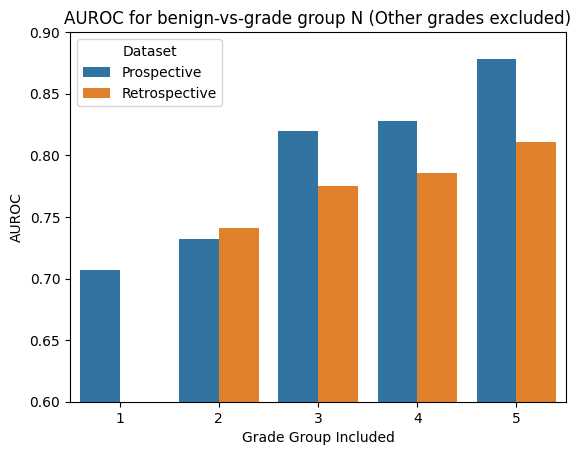

In [8]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from MLstatkit.delong import Delong_test
print(roc_auc_score(
    table['grade_group'] > 0,
    table['average_needle_heatmap_value']
))
print(roc_auc_score(
    nct2013_pred_table['grade_group'] > 0,
    nct2013_pred_table['average_needle_heatmap_value']
))


def get_auroc_with_ci(gt, pred): 
    _, _, (ci_lower, ci_upper), _, auc, *_ = Delong_test(
        gt, pred, pred
    )
    ci = (ci_upper - ci_lower) / 2
    return auc, ci


def get_aurocs_for_benign_vs_group_by_group(table, with_ci=False): 
    outputs = {}
    for grade_group in range(1, 6):
        subtable = table[table['grade_group'].isin([0, grade_group])]
        
        try: 
            if with_ci:
                outputs[grade_group] = get_auroc_with_ci(
                    subtable['grade_group'] > 0,
                    subtable['average_needle_heatmap_value']
                )
            else:
                outputs[grade_group] = roc_auc_score(
                    subtable['grade_group'] > 0,
                    subtable['average_needle_heatmap_value']
                )
        except: 
            outputs[grade_group] = (float('nan'), float('nan'))

    return outputs


prospective = get_aurocs_for_benign_vs_group_by_group(table)
retrospective = get_aurocs_for_benign_vs_group_by_group(nct2013_pred_table)

prospective = pd.DataFrame(prospective, index=['AUROC']).T
prospective['Dataset'] = 'Prospective'
retrospective = pd.DataFrame(retrospective, index=['AUROC']).T
retrospective['Dataset'] = 'Retrospective'
comb = pd.concat([prospective, retrospective], axis=0).reset_index().rename(columns={'index':'Grade Group Included'})
comb
comb

import seaborn as sns
sns.barplot(
    data=comb,
    x='Grade Group Included',
    y='AUROC',
    hue='Dataset'
)
plt.ylim(0.6, 0.9)
plt.title("AUROC for benign-vs-grade group N (Other grades excluded)")

In [9]:
# patient level metrics 
patient_table = table.groupby('patient_id').agg(
    {
        'grade_group': 'max',
        'average_needle_heatmap_value': 'mean',
        'image_level_cancer_logits': 'mean',
        'involvement': 'max', 
        'PRI-MUS': 'max'
    }
)

print(len(patient_table))

print("model PCa", get_auroc_with_ci(
    patient_table['grade_group'] >= 1,
    patient_table['average_needle_heatmap_value']
))

print("model csPCa", get_auroc_with_ci(
    patient_table['grade_group'] >= 3,
    patient_table['image_level_cancer_logits']
))

print("PRI-MUS PCa", get_auroc_with_ci(
    patient_table['grade_group'] >= 1,
    patient_table['PRI-MUS']
))

print("PRI-MUS csPCa", get_auroc_with_ci(
    patient_table['grade_group'] >= 3,
    patient_table['PRI-MUS']
))


71
model PCa (0.7755102040816326, 0.1075624701732174)
model csPCa (0.7152380952380952, 0.1460593181318801)
PRI-MUS PCa (0.7606679035250463, 0.11705235007039594)
PRI-MUS csPCa (0.7938095238095237, 0.10195111793608902)


In [61]:
def get_aurocs_for_gg_groupings(table):
    aurocs = []
    subtable = table[table['grade_group'].isin([0, 1, 2])]
    aurocs.append(roc_auc_score(
        subtable['grade_group'] > 0,
        subtable['average_needle_heatmap_value']
    ))
    subtable = table[table['grade_group'].isin([0, 3])]
    aurocs.append(roc_auc_score(
        subtable['grade_group'] > 0,
        subtable['average_needle_heatmap_value']
    ))
    subtable = table[table['grade_group'].isin([0, 4, 5])]
    aurocs.append(roc_auc_score(
        subtable['grade_group'] > 0,
        subtable['average_needle_heatmap_value']
    ))
    return aurocs

prospective = get_aurocs_for_gg_groupings(table)
retrospective = get_aurocs_for_gg_groupings(nct2013_pred_table)
mean_prospective = sum(prospective) / len(prospective)
mean_retrospective = sum(retrospective) / len(retrospective)
print(mean_prospective)
print(mean_retrospective)

0.793675768134727
0.770132876151297


In [63]:
def get_table_with_ai_outputs(*args, **kwargs):
    table = get_cleaned_ua_metadata_table(*args, **kwargs)
    table = table.join(ai_model_outputs, how='left')
    table = table.loc[~table['image_level_cancer_logits'].isna()]

    import numpy as np
    
    model_cspca_score = table['image_level_cancer_logits']
    counts = table['PRI-MUS'].value_counts(normalize=True)

    bins = [0]
    cum = 0
    for i in range(1, 6):
        prob = counts.at[i]
        cum += prob
        bins.append(np.quantile(model_cspca_score, cum))

    table['binned_model_cspca_score'] = pd.cut(model_cspca_score, bins=bins, labels=range(1, 6)).astype(float)
    table = table.loc[~table['binned_model_cspca_score'].isna()]
    #pd.cut(model_cspca_score, bins=bins).value_counts(normalize=True)

    return table
    

In [64]:
import numpy as np
from typing import Tuple

def delong_auc_variance(y_true: np.ndarray, y_score: np.ndarray) -> Tuple[float, float]:
    """
    DeLong AUC and its asymptotic variance for a single classifier.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Binary ground-truth labels in {0,1}. 1 = positive class.
    y_score : array-like of shape (n_samples,)
        Continuous prediction scores (higher = more likely positive).
    
    Returns
    -------
    auc : float
        ROC AUC (Mann–Whitney form).
    auc_variance : float
        DeLong variance estimate of AUC.
    
    Notes
    -----
    - Requires at least 2 positives and 2 negatives (variance undefined otherwise).
    - Works with ties using midranks.
    - Complexity: O(n log n) for the sort + O(n) for the rest.
    """
    y = np.asarray(y_true, dtype=np.int8).ravel()
    s = np.asarray(y_score, dtype=np.float64).ravel()
    if y.shape != s.shape:
        raise ValueError("y_true and y_score must have the same shape")
    if not set(np.unique(y)).issubset({0, 1}):
        raise ValueError("y_true must be binary and contain only 0/1")
    if not np.isfinite(s).all():
        raise ValueError("y_score contains NaN or inf")

    # Order so that positives come first (as in the DeLong reference implementation)
    order = (-y).argsort(kind="mergesort")
    y = y[order]
    s = s[order]

    m = int(y.sum())          # number of positives
    n = y.size - m            # number of negatives
    if m < 2 or n < 2:
        raise ValueError("Need at least 2 positives and 2 negatives to estimate variance")

    s_pos = s[:m]
    s_neg = s[m:]

    # ---- midranks (average ranks for ties), returned as 1-based ranks ----
    def _midrank(x: np.ndarray) -> np.ndarray:
        J = np.argsort(x, kind="mergesort")
        Z = x[J]
        N = x.size
        ranks = np.empty(N, dtype=np.float64)

        # Find start indices of unique-value runs
        # idx = [0, i1, i2, ..., N]
        diffs = np.diff(Z)
        run_starts = np.concatenate(([0], np.nonzero(diffs != 0)[0] + 1))
        run_ends = np.concatenate((run_starts[1:], [N]))

        # Assign midrank to each run
        # midrank in 1-based indexing = (start + end - 1)/2 + 1
        for a, b in zip(run_starts, run_ends):
            mid = (a + b - 1) * 0.5 + 1.0
            ranks[a:b] = mid

        # Undo sorting
        out = np.empty(N, dtype=np.float64)
        out[J] = ranks
        return out

    tx = _midrank(s_pos)
    ty = _midrank(s_neg)
    tz = _midrank(s)

    # AUC as Mann–Whitney U / (m*n)
    auc = tz[:m].sum() / (m * n) - (m + 1.0) / (2.0 * n)

    # DeLong variance components (Sun & Xu, 2014; same as in VMAF/yandex implementation)
    v01 = (tz[:m] - tx) / n                 # shape (m,)
    v10 = 1.0 - (tz[m:] - ty) / m           # shape (n,)

    # Sample variances with ddof=1 (same as np.cov for 1-D)
    sx = np.var(v01, ddof=1)
    sy = np.var(v10, ddof=1)
    auc_variance = sx / m + sy / n

    return float(auc), float(auc_variance)

In [ ]:
# Compare ROC between datasets using the Delong method 
gt_nct2013 = (nct2013_pred_table['grade_group'] >= 1).to_numpy().astype(int)
score_nct2013 = nct2013_pred_table['average_needle_heatmap_value'].to_numpy()
gt_nct2013 = gt_nct2013[~np.isnan(score_nct2013)]
score_nct2013 = score_nct2013[~np.isnan(score_nct2013)]

tab_optimum = get_table_with_ai_outputs(filter_has_primus=False, filter_has_pirads=False)
gt_optimum = (tab_optimum['grade_group'] >= 1).to_numpy().astype(int)
score_optimum = tab_optimum['average_needle_heatmap_value'].to_numpy()
gt_optimum = gt_optimum[~np.isnan(score_optimum)]
score_optimum = score_optimum[~np.isnan(score_optimum)]

auc_optimum, auc_var_optimum = delong_auc_variance(gt_optimum, score_optimum)
auc_nct2013, auc_var_nct2013 = delong_auc_variance(gt_nct2013, score_nct2013)

import scipy
delta = auc_optimum - auc_nct2013
var_delta = auc_var_optimum + auc_var_nct2013
z = delta / np.sqrt(var_delta)

p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))
print(p)

se = np.sqrt(var_delta)
ci_lo, ci_hi = delta - 1.96*se, delta + 1.96*se
print(delta, (ci_lo, ci_hi))


0.38958951130980846
-0.015795727732155762 (np.float64(-0.05178014521999434), np.float64(0.020188689755682818))


In [27]:
import numpy as np, math
from typing import Tuple


def mcnemar_pvalue_from_preds(pred1: np.ndarray, pred2: np.ndarray, *, midp: bool=False) -> Tuple[float,int,int]:
    """
    Exact two-sided McNemar p-value for paired binary outcomes.

    Parameters
    ----------
    pred1, pred2 : array-like, shape (n,)
        Binary predictions in {0,1} for the SAME n items from two models.
        Use the SAME threshold you’ve already chosen for each model.

        For SENSITIVITY: pass the predictions RESTRICTED TO TRUE POSITIVES (y==1),
                         with 1 = predicted positive.
        For SPECIFICITY: pass the predictions RESTRICTED TO TRUE NEGATIVES (y==0),
                         with 1 = predicted positive (this tests FPR; p-value is
                         identical for specificity differences).

    midp : bool, default False
        If True, use Edwards' mid-p correction (slightly less conservative).

    Returns
    -------
    p_value : float
    b : int   # count of items with pred1=1, pred2=0
    c : int   # count of items with pred1=0, pred2=1
    """
    x = np.asarray(pred1, dtype=np.int8).ravel()
    y = np.asarray(pred2, dtype=np.int8).ravel()
    if x.shape != y.shape:
        raise ValueError("pred1 and pred2 must have the same shape")
    if not set(np.unique(x)).issubset({0,1}) or not set(np.unique(y)).issubset({0,1}):
        raise ValueError("pred arrays must be binary {0,1}")

    b = int(((x == 1) & (y == 0)).sum())
    c = int(((x == 0) & (y == 1)).sum())
    n = b + c
    if n == 0:
        return 1.0, b, c  # models identical on this stratum

    # Binomial(n, 0.5) exact two-sided test
    k = min(b, c)
    denom = float(2 ** n)
    if midp:
        pmf_k = math.comb(n, k) / denom
        cdf_km1 = sum(math.comb(n, i) for i in range(k)) / denom if k > 0 else 0.0
        p = 2.0 * (cdf_km1 + 0.5 * pmf_k)
    else:
        cdf_k = sum(math.comb(n, i) for i in range(k + 1)) / denom
        p = 2.0 * cdf_k
    return min(1.0, p), b, c


In [49]:
from sklearn.metrics import recall_score, roc_auc_score
from MLstatkit import Delong_test

tab = get_table_with_ai_outputs(filter_has_primus=True, filter_has_pirads=False)

t = 1
primus_t = 3
pirads_t = 3
model_hmap_t = 0.12
model_cspca_t = 0.19


import numpy as np

def _wilson_ci(x, n, z=1.96):
    """Wilson score confidence interval for a proportion x/n."""
    if n == 0:
        return (np.nan, np.nan)  # undefined
    p = x / n
    denom = 1.0 + (z**2)/n
    center = (p + (z**2)/(2*n)) / denom
    half = z * np.sqrt((p*(1-p)/n) + (z**2)/(4*n*n)) / denom
    return center - half, center + half

def get_sens_with_ci(y_true, y_pred, z=1.96):
    """
    Returns (sensitivity, halfwidth, ci_low, ci_high).
    y_true, y_pred are 0/1 arrays; threshold already applied.
    """
    y = np.asarray(y_true, dtype=np.int8).ravel()
    yhat = np.asarray(y_pred, dtype=np.int8).ravel()
    pos = (y == 1)
    n_pos = int(pos.sum())
    tp = int((yhat[pos] == 1).sum())
    sens = tp / n_pos if n_pos else np.nan
    lo, hi = _wilson_ci(tp, n_pos, z=z)
    half = (hi - lo) / 2 if np.isfinite(lo) and np.isfinite(hi) else np.nan
    return sens, half, lo, hi

def get_spec_with_ci(y_true, y_pred, z=1.96):
    """
    Returns (specificity, halfwidth, ci_low, ci_high).
    """
    y = np.asarray(y_true, dtype=np.int8).ravel()
    yhat = np.asarray(y_pred, dtype=np.int8).ravel()
    neg = (y == 0)
    n_neg = int(neg.sum())
    tn = int((yhat[neg] == 0).sum())
    spec = tn / n_neg if n_neg else np.nan
    lo, hi = _wilson_ci(tn, n_neg, z=z)
    half = (hi - lo) / 2 if np.isfinite(lo) and np.isfinite(hi) else np.nan
    return spec, half, lo, hi


def get_auroc_with_ci(gt, pred): 
    _, _, (ci_lower, ci_upper), _, auc, *_ = Delong_test(
        gt, pred, pred
    )
    ci = (ci_upper - ci_lower) / 2
    return auc, ci


metrics_gg2 = {}
# metrics_gg2['PRI-MUS_auroc'] = roc_auc_score(
#     tab['grade_group'] >= t, tab['PRI-MUS']
# )
metrics_gg2['PRI-MUS_auroc'] = get_auroc_with_ci(
    tab['grade_group'] >= t, tab['PRI-MUS']
)
metrics_gg2['PRI-MUS_sens'] = get_sens_with_ci(
    tab['grade_group'] >= t , tab['PRI-MUS'] >= primus_t
)
metrics_gg2['PRI-MUS_spec'] = get_spec_with_ci(
    tab['grade_group'] >= t , tab['PRI-MUS'] >= primus_t
)
metrics_gg2['hmap_auroc'] = get_auroc_with_ci(
    tab['grade_group'] >= t, tab['average_needle_heatmap_value']
)
metrics_gg2['hmap_sens'] = get_sens_with_ci(
    tab['grade_group'] >= t, tab['average_needle_heatmap_value'] >= model_hmap_t
)
metrics_gg2['hmap_spec'] = get_spec_with_ci(
    tab['grade_group'] >= t, tab['average_needle_heatmap_value'] >= model_hmap_t
)
metrics_gg2['model_auroc'] = get_auroc_with_ci(
    tab['grade_group'] >= t, tab['image_level_cancer_logits']
)
metrics_gg2['model_sens'] = get_sens_with_ci(
    tab['grade_group'] >= t, tab['image_level_cancer_logits'] >= model_cspca_t
)
metrics_gg2['model_spec'] = get_spec_with_ci(
    tab['grade_group'] >= t, tab['image_level_cancer_logits'] >= model_cspca_t
)

metrics_gg2

{'PRI-MUS_auroc': (0.709484433786745, 0.03169171074445365),
 'PRI-MUS_sens': (0.5706371191135734,
  np.float64(0.05079754353320598),
  np.float64(0.5190958019624831),
  np.float64(0.620690889028895)),
 'PRI-MUS_spec': (0.7820895522388059,
  np.float64(0.031212006565663808),
  np.float64(0.7492693409795159),
  np.float64(0.8116933541108435)),
 'hmap_auroc': (0.7486004878653822, 0.03137367976917771),
 'hmap_sens': (0.6343490304709142,
  np.float64(0.04944008994933413),
  np.float64(0.5834943122679569),
  np.float64(0.6823744921666252)),
 'hmap_spec': (0.7298507462686568,
  np.float64(0.03355270482456851),
  np.float64(0.6949876524344669),
  np.float64(0.762093062083604)),
 'model_auroc': (0.7164427171621119, 0.032517331992461096),
 'model_sens': (0.5290858725761773,
  np.float64(0.05122071084176397),
  np.float64(0.47755890200940215),
  np.float64(0.5800003236929301)),
 'model_spec': (0.7507462686567165,
  np.float64(0.03269340398521969),
  np.float64(0.7166233493882734),
  np.float64(0.

In [ ]:
Delong_test(
    tab['grade_group'] >= t, tab['PRI-MUS'], tab['image_level_cancer_logits']
)

In [41]:
pred1 = tab['image_level_cancer_logits'] >= 0.19
pred2 = tab['PRI-MUS'] >= primus_t
gt = tab['grade_group'] >= t


print(mcnemar_pvalue_from_preds(
    pred1[gt == 0],
    pred2[gt == 0],
))
print(mcnemar_pvalue_from_preds(
    pred1[gt == 1],
    pred2[gt == 1],
))

(0.39336993637572853, 142, 127)
(0.0931396484375, 7, 16)


(-2.1494672492226017,
 0.031597379554446685,
 (0.8021529531034677, 0.8850183446714712),
 (0.7465889726240038, 0.8354189055831718),
 0.8435856488874695,
 0.7910039391035878,
 {'method': 'delong',
  'var_diff': 0.0005984222642799573,
  'tie_rate_A': 0.9951503394762367,
  'tie_rate_B': 0.0,
  'n_pos': 101,
  'n_neg': 930,
  'n_boot': 0,
  'messages': []})

In [51]:
from sklearn.metrics import recall_score, roc_auc_score


tab = get_table_with_ai_outputs(filter_has_primus=True, filter_has_pirads=True)
print(f"Number of samples with PIRADS: {len(tab)}")
t = 1
metrics_gg2 = {}
metrics_gg2['PRI-MUS_auroc'] = get_auroc_with_ci(
    tab['grade_group'] >= t, tab['PRI-MUS']
)
metrics_gg2['PRI-MUS_sens'] = get_sens_with_ci(
    tab['grade_group'] >= t , tab['PRI-MUS'] >= primus_t
)
metrics_gg2['PRI-MUS_spec'] = get_spec_with_ci(
    tab['grade_group'] >= t , tab['PRI-MUS'] >= primus_t
)
metrics_gg2['PI-RADS_auroc'] = get_auroc_with_ci(
    tab['grade_group'] >= t, tab['PI-RADS']
)
metrics_gg2['PI-RADS_sens'] = get_sens_with_ci(
    tab['grade_group'] >= t , tab['PI-RADS'] >= pirads_t
)
metrics_gg2['PI-RADS_spec'] = get_spec_with_ci(
    tab['grade_group'] >= t , tab['PI-RADS'] >= pirads_t
)
metrics_gg2['hmap_auroc'] = get_auroc_with_ci(
    tab['grade_group'] >= t, tab['average_needle_heatmap_value']
)
metrics_gg2['hmap_sens'] = get_sens_with_ci(
    tab['grade_group'] >= t, tab['average_needle_heatmap_value'] >= model_hmap_t
)
metrics_gg2['hmap_spec'] = get_spec_with_ci(
    tab['grade_group'] >= t, tab['average_needle_heatmap_value'] >= model_hmap_t
)
metrics_gg2['model_auroc'] = get_auroc_with_ci(
    tab['grade_group'] >= t, tab['image_level_cancer_logits']
)
metrics_gg2['model_sens'] = get_sens_with_ci(
    tab['grade_group'] >= t, tab['image_level_cancer_logits'] >= model_cspca_t
)
metrics_gg2['model_spec'] = get_spec_with_ci(
    tab['grade_group'] >= t, tab['image_level_cancer_logits'] >= model_cspca_t
)
metrics_gg2

Number of samples with PIRADS: 307


{'PRI-MUS_auroc': (0.8206880838459786, 0.05480281452177338),
 'PRI-MUS_sens': (0.7105263157894737,
  np.float64(0.09999445872112767),
  np.float64(0.6004023269144307),
  np.float64(0.8003912443566861)),
 'PRI-MUS_spec': (0.8398268398268398,
  np.float64(0.047237464595015766),
  np.float64(0.7870303993609443),
  np.float64(0.8815053285509759)),
 'PI-RADS_auroc': (0.791552745500114, 0.057639492069688436),
 'PI-RADS_sens': (0.6710526315789473,
  np.float64(0.10338640720748793),
  np.float64(0.5594359811214032),
  np.float64(0.7662087955363791)),
 'PI-RADS_spec': (0.8484848484848485,
  np.float64(0.04621133193934024),
  np.float64(0.7965729107161348),
  np.float64(0.8889955745948153)),
 'hmap_auroc': (0.7845750740487583, 0.06267307121213228),
 'hmap_sens': (0.6710526315789473,
  np.float64(0.10338640720748793),
  np.float64(0.5594359811214032),
  np.float64(0.7662087955363791)),
 'hmap_spec': (0.7662337662337663,
  np.float64(0.05430517292665904),
  np.float64(0.7075734720834244),
  np.flo

In [ ]:
tab = tab.loc[tab['grade_group'].isin([1, 2, 3, 4, 5])]
roc_auc_score(
    tab['grade_group'] >= 3, tab['average_needle_heatmap_value']
)
roc_auc_score(
    tab['grade_group'] >= 2, tab['PRI-MUS']
)

0.7014448501636867

In [ ]:
roc_auc_score(
    tab['grade_group'] >= 2, tab['image_level_cancer_logits']
)

0.6074351548728281

In [ ]:
tab = tab.loc[tab['grade_group'].isin([1, 2])]
roc_auc_score(
    tab['grade_group'] >= 2, tab['image_level_cancer_logits']
)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
tab.grade_group.value_counts()

grade_group
1.0    152
2.0    108
3.0     55
4.0     31
5.0     15
Name: count, dtype: int64

grade_group
0.0    Axes(0.125,0.11;0.775x0.77)
1.0    Axes(0.125,0.11;0.775x0.77)
2.0    Axes(0.125,0.11;0.775x0.77)
3.0    Axes(0.125,0.11;0.775x0.77)
4.0    Axes(0.125,0.11;0.775x0.77)
5.0    Axes(0.125,0.11;0.775x0.77)
Name: average_needle_heatmap_value, dtype: object

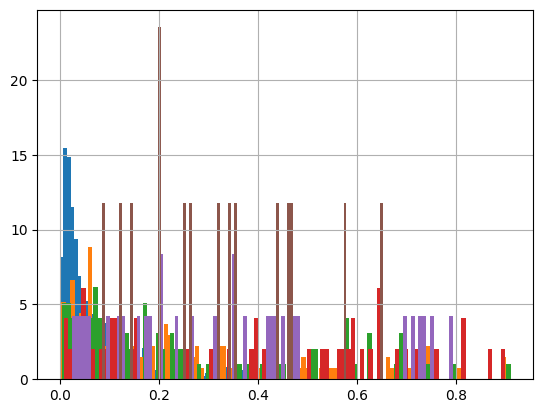

In [ ]:
tab.groupby('grade_group')['average_needle_heatmap_value'].hist(density=True)

In [ ]:
roc_auc_score(
    tab['grade_group'] >= 2, tab['average_needle_heatmap_value'] + tab['image_level_cancer_logits']
)

0.7455791103505279

In [ ]:
roc_auc_score(
    tab['grade_group'] >= 2, tab['average_needle_heatmap_value']
)

0.7422787226859451

In [ ]:
roc_auc_score(
    tab['grade_group'] >= 2, tab['image_level_cancer_logits']
)

0.7312541473125415

In [ ]:
from sklearn.metrics import recall_score, roc_auc_score


tab = get_table_with_ai_outputs(filter_has_primus=True, filter_has_pirads=False)

metrics = {}
metrics['PRI-MUS_auroc_1+'] = roc_auc_score(
    tab['grade_group'] >= 1, tab['PRI-MUS']
)
metrics['model_auroc_1+'] = roc_auc_score(
    tab['grade_group'] >= 1, tab['image_level_cancer_logits']
)
metrics['PRI-MUS_auroc_2+'] = roc_auc_score(
    tab['grade_group'] >= 2, tab['PRI-MUS']
)
metrics['model_auroc_2+'] = roc_auc_score(
    tab['grade_group'] >= 2, tab['image_level_cancer_logits']
)
metrics['PRI-MUS_auroc_3+'] = roc_auc_score(
    tab['grade_group'] >= 3, tab['PRI-MUS']
)
metrics['model_auroc_3+'] = roc_auc_score(
    tab['grade_group'] >= 3, tab['image_level_cancer_logits']
)
metrics['PRI-MUS_auroc_4+'] = roc_auc_score(
    tab['grade_group'] >= 4, tab['PRI-MUS']
)
metrics['model_auroc_4+'] = roc_auc_score(
    tab['grade_group'] >= 4, tab['image_level_cancer_logits']
)

metrics

{'PRI-MUS_auroc_1+': 0.709484433786745,
 'model_auroc_1+': 0.7164427171621118,
 'PRI-MUS_auroc_2+': 0.7747907426163285,
 'model_auroc_2+': 0.7312541473125415,
 'PRI-MUS_auroc_3+': 0.8435856488874695,
 'model_auroc_3+': 0.7910039391035878,
 'PRI-MUS_auroc_4+': 0.8280291326418009,
 'model_auroc_4+': 0.7963142794085192}

In [ ]:

tab = get_table_with_ai_outputs(filter_has_primus=True, filter_has_pirads=True)
roc_auc_score(
    tab['grade_group'] >= 3, tab['binned_model_cspca_score'] + tab['PRI-MUS'] + tab['PI-RADS']
)

0.9403949293027791

In [ ]:
tab['binned_model_cspca_score'].loc[tab['binned_model_cspca_score'].isna()]

core_id
UA-139-006   NaN
Name: binned_model_cspca_score, dtype: float64

In [ ]:
roc_auc_score(tab['grade_group'] >= 3, tab['PRI-MUS'])

0.8435856488874695

In [65]:
def get_patient_table(table, agg='max'):
    table_patient = table.groupby("patient_id")[
        ["PRI-MUS", "binned_model_cspca_score", "grade_group", "PI-RADS"]
    ].aggregate(agg)

    def get_cspca_status(g):
        if g == 0:
            return "none"
        elif g < 3:
            return "isPCa"
        else:
            return "csPCa"

    table_patient["status"] = table_patient["grade_group"].apply(get_cspca_status)
    return table_patient

tab = get_patient_table(get_table_with_ai_outputs(filter_has_primus=True), agg='max')

from sklearn.metrics import recall_score, roc_auc_score

roc_auc_score(tab['status']=='csPCa', tab['PRI-MUS'])
roc_auc_score(tab['status']=='csPCa', tab['binned_model_cspca_score'])


np.float64(0.6671428571428571)

In [ ]:
print(recall_score(tab['status'].isin(['csPCa', 'isPCa']), tab['PRI-MUS'] >= 3))
print(recall_score(tab['status'].isin(['csPCa', 'isPCa']), tab['binned_model_cspca_score'] >= 3))

0.8163265306122449
0.7142857142857143


In [ ]:
print(recall_score(tab['status'].isin(['csPCa']), tab['PRI-MUS'] >= 3))
print(recall_score(tab['status'].isin(['csPCa']), tab['binned_model_cspca_score'] >= 3))

0.9523809523809523
0.7619047619047619


In [ ]:
print(roc_auc_score(tab['status'] == 'csPCa', tab['PRI-MUS']))
print(roc_auc_score(tab['status'] == 'csPCa', tab['binned_model_cspca_score']))


0.7938095238095237
0.6671428571428571


In [ ]:
print(recall_score(tab['status']=='csPCa', tab['PRI-MUS'] >= 3, pos_label=0))
print(recall_score(tab['status']=='csPCa', tab['binned_model_cspca_score'] >= 3, pos_label=0))

0.42
0.42


In [ ]:
import json


model_score = 'image_level_cancer_logits'
minimum_grade_group = 2


def get_metrics_model_vs_expert(model_score, minimum_grade_group, ai_model_outputs, pct_cancer_threshold=None):

    metrics = {}

    from sklearn.metrics import roc_auc_score

    table = get_cleaned_ua_metadata_table(filter_has_primus=True, filter_pct_cancer_threshold=pct_cancer_threshold)
    table = table.join(ai_model_outputs, how='left')
    table = table.loc[~table[model_score].isna()]

    metrics['systematic_and_targeted_samples'] = dict(
        model_cspca_score_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['image_level_cancer_logits']), 
        model_heatmap_score_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['average_needle_heatmap_value']),
        pri_mus_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['PRI-MUS'])
    )

    table = get_cleaned_ua_metadata_table(filter_has_primus=True, filter_has_pirads=True, filter_pct_cancer_threshold=pct_cancer_threshold)
    table = table.join(ai_model_outputs, how='left')
    table = table.loc[~table[model_score].isna()]

    metrics['pi_rads_targeted_samples'] = dict(
        model_cspca_score_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['image_level_cancer_logits']), 
        model_heatmap_score_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['average_needle_heatmap_value']),
        pri_mus_auc=roc_auc_score(table['grade_group'] > minimum_grade_group, table['PRI-MUS']),
        pi_rads=roc_auc_score(table['grade_group'] > minimum_grade_group, table['PI-RADS']),
    )

    return metrics

metrics = {}
metrics['CSPCA-vs-nonCSPCA'] = get_metrics_model_vs_expert('image_level_cancer_logits', 2, ai_model_outputs)
metrics['PCa-vs-Benign'] = get_metrics_model_vs_expert('image_level_cancer_logits', 0, ai_model_outputs)

print(json.dumps(metrics, indent=2))

{
  "CSPCA-vs-nonCSPCA": {
    "systematic_and_targeted_samples": {
      "model_cspca_score_auc": 0.7910039391035878,
      "model_heatmap_score_auc": 0.7770360907058449,
      "pri_mus_auc": 0.8435856488874695
    },
    "pi_rads_targeted_samples": {
      "model_cspca_score_auc": 0.8712342079689018,
      "model_heatmap_score_auc": 0.8095238095238096,
      "pri_mus_auc": 0.9164237123420798,
      "pi_rads": 0.8814382896015549
    }
  },
  "PCa-vs-Benign": {
    "systematic_and_targeted_samples": {
      "model_cspca_score_auc": 0.7164427171621118,
      "model_heatmap_score_auc": 0.7486004878653822,
      "pri_mus_auc": 0.709484433786745
    },
    "pi_rads_targeted_samples": {
      "model_cspca_score_auc": 0.8015404508911002,
      "model_heatmap_score_auc": 0.7872603586889302,
      "pri_mus_auc": 0.8227919266880306,
      "pi_rads": 0.7940349693596448
    }
  }
}


In [ ]:
table = get_cleaned_ua_metadata_table()
len(table)


1124

In [ ]:
table = get_cleaned_ua_metadata_table(filter_has_primus=True)
len(table)
table = get_table_with_ai_outputs()
table.grade_group.value_counts()
#len(table)

grade_group
0.0    672
1.0    153
2.0    109
3.0     59
4.0     31
5.0     15
Name: count, dtype: int64

In [ ]:
len(table)

1040

In [ ]:
import json

from sklearn.metrics import balanced_accuracy_score
import torch

def get_cspca_metrics():

    from sklearn.metrics import recall_score, roc_auc_score
    from src.utils import calculate_metrics

    all_metrics = {}

    table = get_table_with_ai_outputs(filter_has_primus=True, filter_pct_cancer_threshold=0)

    table = get_table_with_ai_outputs(filter_has_primus=True, filter_pct_cancer_threshold=0)
    n_samples = len(table)

    true_label = (table['grade_group'] > 2).astype(int)
    primus_score = table['PRI-MUS']
    primus_prediction = (primus_score > 2).astype(int)
    model_cspca_score = table['image_level_cancer_logits']

    metrics = dict() 
    metrics['num_samples'] = n_samples
    metrics['PRI-MUS_auroc'] = roc_auc_score(true_label, primus_score)
    metrics['PRI-MUS_sens'] = recall_score(true_label, primus_prediction)
    metrics['PRI-MUS_spec'] = recall_score(true_label, primus_prediction, pos_label=0)
    metrics['PRI-MUS_bacc'] = balanced_accuracy_score(true_label, primus_prediction)
    model_metrics = calculate_metrics(model_cspca_score, true_label)
    metrics['ProstNFound_csPCa_score_auroc'] = model_metrics['core_auc']

    #metrics['ProstNFound_csPCa_score_sens'] = model_metrics['sens_at_60_spe']
    #metrics['ProstNFound_csPCa_score_spec'] = 0.60
    temp = 1 
    bias = 2.5
    model_cspca_score = score = ((torch.tensor(model_cspca_score.values).log() + bias) / temp).sigmoid().numpy() * 5
    pred = score >= 3
        
    model_prediction = (table['binned_model_cspca_score'] > 2).astype(int)

    metrics['ProstNFound_csPCa_score_sens'] = recall_score(
        true_label, model_prediction
    )
    metrics['ProstNFound_csPCa_score_spec'] = recall_score(
        true_label, model_prediction, pos_label=0
    )
    metrics['ProstNFound_csPCa_score_bacc'] = balanced_accuracy_score(
        true_label, model_prediction
    )


    all_metrics['all_samples'] = metrics

    table = get_table_with_ai_outputs(filter_has_primus=True, filter_has_pirads=True, filter_pct_cancer_threshold=0)
    n_samples = len(table)

    model_prediction = (table['binned_model_cspca_score'] > 2).astype(int)
    true_label = (table['grade_group'] > 2).astype(int)
    primus_score = table['PRI-MUS']
    pirads_score = table['PI-RADS']
    pirads_prediction = (pirads_score > 2).astype(int)
    primus_prediction = (primus_score > 2).astype(int)
    model_cspca_score = table['image_level_cancer_logits']
    #model_prediction = (table['binned_model_cspca_score'] > 2).astype(int)

    metrics = {}
    metrics['num_samples'] = n_samples
    metrics['PRI-MUS_auroc'] = roc_auc_score(true_label, primus_score)
    metrics['PRI-MUS_sens'] = recall_score(true_label, primus_prediction)
    metrics['PRI-MUS_spec'] = recall_score(true_label, primus_prediction, pos_label=0)
    metrics['PRI-MUS_bacc'] = balanced_accuracy_score(true_label, primus_prediction)
    metrics['PI-RADS_auroc'] = roc_auc_score(true_label, pirads_score)
    metrics['PI-RADS_sens'] = recall_score(true_label, pirads_prediction)
    metrics['PI-RADS_spec'] = recall_score(true_label, pirads_prediction, pos_label=0)
    metrics['PI-MUS_bacc'] = balanced_accuracy_score(true_label, pirads_prediction)

    model_metrics = calculate_metrics(model_cspca_score, true_label)
    metrics['ProstNFound_csPCa_score_auroc'] = model_metrics['core_auc']
    metrics['ProstNFound_csPCa_score_sens'] = model_metrics['sens_at_60_spe']
    metrics['ProstNFound_csPCa_score_spec'] = 0.60
    #metrics['ProstNFound_csPCa_sc']

    metrics['ProstNFound_csPCa_score_sens'] = recall_score(
        true_label, model_prediction
    )
    metrics['ProstNFound_csPCa_score_spec'] = recall_score(
        true_label, model_prediction, pos_label=0
    )
    metrics['ProstNFound_csPCa_score_bacc'] = balanced_accuracy_score(
        true_label, model_prediction
    )

    all_metrics['PI-RADS_targeted_samples'] = metrics

    return all_metrics


data = get_cspca_metrics()
print(json.dumps(data, indent=2))
#data

{
  "all_samples": {
    "num_samples": 1031,
    "PRI-MUS_auroc": 0.8435856488874695,
    "PRI-MUS_sens": 0.8514851485148515,
    "PRI-MUS_spec": 0.7139784946236559,
    "PRI-MUS_bacc": 0.7827318215692537,
    "ProstNFound_csPCa_score_auroc": 0.7910039391035878,
    "ProstNFound_csPCa_score_sens": 0.7524752475247525,
    "ProstNFound_csPCa_score_spec": 0.7032258064516129,
    "ProstNFound_csPCa_score_bacc": 0.7278505269881828
  },
  "PI-RADS_targeted_samples": {
    "num_samples": 308,
    "PRI-MUS_auroc": 0.9164237123420798,
    "PRI-MUS_sens": 1.0,
    "PRI-MUS_spec": 0.7346938775510204,
    "PRI-MUS_bacc": 0.8673469387755102,
    "PI-RADS_auroc": 0.8814382896015549,
    "PI-RADS_sens": 0.9285714285714286,
    "PI-RADS_spec": 0.7482993197278912,
    "PI-MUS_bacc": 0.83843537414966,
    "ProstNFound_csPCa_score_auroc": 0.8712342079689018,
    "ProstNFound_csPCa_score_sens": 0.8571428571428571,
    "ProstNFound_csPCa_score_spec": 0.7312925170068028,
    "ProstNFound_csPCa_score_bacc":

In [ ]:
#import json
#
#import torch
#
#def get_cspca_metrics():
#
#    from sklearn.metrics import recall_score, roc_auc_score
#    from src.utils import calculate_metrics
#
#    all_metrics = {}
#
#    table = get_cleaned_ua_metadata_table(filter_has_primus=True, filter_pct_cancer_threshold=0)
#    table = table.join(ai_model_outputs, how='left')
#    table = table.loc[~table['image_level_cancer_logits'].isna()]
#
#    true_label = (table['grade_group'] > 2).astype(int)
#    primus_score = table['PRI-MUS']
#    primus_prediction = (primus_score > 2).astype(int)
#    model_cspca_score = table['image_level_cancer_logits']
#
#    metrics = dict() 
#    metrics['PRI-MUS_auroc'] = roc_auc_score(true_label, primus_score)
#    metrics['PRI-MUS_sens'] = recall_score(true_label, primus_prediction)
#    metrics['PRI-MUS_spec'] = recall_score(true_label, primus_prediction, pos_label=0)
#    model_metrics = calculate_metrics(model_cspca_score, true_label)
#    metrics['ProstNFound_csPCa_score_auroc'] = model_metrics['core_auc']
#
#    #metrics['ProstNFound_csPCa_score_sens'] = model_metrics['sens_at_60_spe']
#    #metrics['ProstNFound_csPCa_score_spec'] = 0.60
#    temp = 1 
#    bias = 2.5
#    model_cspca_score = score = ((torch.tensor(model_cspca_score.values).log() + bias) / temp).sigmoid().numpy() * 5
#    pred = score >= 3
#        
#    metrics['ProstNFound_csPCa_score_sens'] = recall_score(
#        true_label, pred
#    )
#    metrics['ProstNFound_csPCa_score_spec'] = recall_score(
#        true_label, pred, pos_label=0
#    )
#
#
#    all_metrics['all_samples'] = metrics
#
#    table = get_cleaned_ua_metadata_table(filter_has_primus=True, filter_has_pirads=True, filter_pct_cancer_threshold=0)
#    table = table.join(ai_model_outputs, how='left')
#    table = table.loc[~table['image_level_cancer_logits'].isna()]
#
#    true_label = (table['grade_group'] > 2).astype(int)
#    primus_score = table['PRI-MUS']
#    pirads_score = table['PI-RADS']
#    pirads_prediction = (pirads_score > 2).astype(int)
#    primus_prediction = (primus_score > 2).astype(int)
#    model_cspca_score = table['image_level_cancer_logits']
#
#    metrics = {}
#    metrics['PRI-MUS_auroc'] = roc_auc_score(true_label, primus_score)
#    metrics['PRI-MUS_sens'] = recall_score(true_label, primus_prediction)
#    metrics['PRI-MUS_spec'] = recall_score(true_label, primus_prediction, pos_label=0)
#    metrics['PI-RADS_auroc'] = roc_auc_score(true_label, pirads_score)
#    metrics['PI-RADS_sens'] = recall_score(true_label, pirads_prediction)
#    metrics['PI-RADS_spec'] = recall_score(true_label, pirads_prediction, pos_label=0)
#
#    model_metrics = calculate_metrics(model_cspca_score, true_label)
#    metrics['ProstNFound_csPCa_score_auroc'] = model_metrics['core_auc']
#    metrics['ProstNFound_csPCa_score_sens'] = model_metrics['sens_at_60_spe']
#    metrics['ProstNFound_csPCa_score_spec'] = 0.60
#
#    all_metrics['PI-RADS_targeted_samples'] = metrics
#
#    return all_metrics
#
#
#data = get_cspca_metrics()
#print(json.dumps(data, indent=2))
#data

In [ ]:
import json

metrics = {}


def get_benign_vs_cancer_metrics():

    from sklearn.metrics import recall_score, roc_auc_score
    from src.utils import calculate_metrics

    all_metrics = {}

    table = get_cleaned_ua_metadata_table(filter_has_primus=True, filter_pct_cancer_threshold=0)
    table = table.join(ai_model_outputs, how='left')
    table = table.loc[~table['average_needle_heatmap_value'].isna()]

    true_label = (table['grade_group'] > 0).astype(int)
    primus_score = table['PRI-MUS']
    primus_prediction = (primus_score > 2).astype(int)
    model_score = table['average_needle_heatmap_value']

    metrics = dict() 
    metrics['PRI-MUS_auroc'] = roc_auc_score(true_label, primus_score)
    metrics['PRI-MUS_sens'] = recall_score(true_label, primus_prediction)
    metrics['PRI-MUS_spec'] = recall_score(true_label, primus_prediction, pos_label=0)
    model_metrics = calculate_metrics(model_score, true_label)
    metrics['ProstNFound_heatmap_score_auroc'] = model_metrics['core_auc']
    metrics['ProstNFound_heatmap_score_sens'] = model_metrics['sens_at_60_spe']
    metrics['ProstNFound_heatmap_score_spec'] = 0.60

    all_metrics['all_samples'] = metrics

    table = get_cleaned_ua_metadata_table(filter_has_primus=True, filter_has_pirads=True, filter_pct_cancer_threshold=0)
    table = table.join(ai_model_outputs, how='left')
    table = table.loc[~table['average_needle_heatmap_value'].isna()]

    true_label = (table['grade_group'] > 0).astype(int)
    primus_score = table['PRI-MUS']
    pirads_score = table['PI-RADS']
    pirads_prediction = (pirads_score > 2).astype(int)
    primus_prediction = (primus_score > 2).astype(int)
    model_score = table['average_needle_heatmap_value']

    metrics = {}
    metrics['PRI-MUS_auroc'] = roc_auc_score(true_label, primus_score)
    metrics['PRI-MUS_sens'] = recall_score(true_label, primus_prediction)
    metrics['PRI-MUS_spec'] = recall_score(true_label, primus_prediction, pos_label=0)
    metrics['PI-RADS_auroc'] = roc_auc_score(true_label, pirads_score)
    metrics['PI-RADS_sens'] = recall_score(true_label, pirads_prediction)
    metrics['PI-RADS_spec'] = recall_score(true_label, pirads_prediction, pos_label=0)

    model_metrics = calculate_metrics(model_score, true_label)
    metrics['ProstNFound_heatmap_score_auroc'] = model_metrics['core_auc']
    metrics['ProstNFound_heatmap_score_sens'] = model_metrics['sens_at_60_spe']
    metrics['ProstNFound_heatmap_score_spec'] = 0.60

    all_metrics['PI-RADS_targeted_samples'] = metrics
    return all_metrics

data = get_benign_vs_cancer_metrics()
print(json.dumps(data, indent=2))

{
  "all_samples": {
    "PRI-MUS_auroc": 0.709484433786745,
    "PRI-MUS_sens": 0.5706371191135734,
    "PRI-MUS_spec": 0.7820895522388059,
    "ProstNFound_heatmap_score_auroc": 0.7486004878653822,
    "ProstNFound_heatmap_score_sens": 0.7479224376731302,
    "ProstNFound_heatmap_score_spec": 0.6
  },
  "PI-RADS_targeted_samples": {
    "PRI-MUS_auroc": 0.8227919266880306,
    "PRI-MUS_sens": 0.7142857142857143,
    "PRI-MUS_spec": 0.8398268398268398,
    "PI-RADS_auroc": 0.7940349693596448,
    "PI-RADS_sens": 0.6753246753246753,
    "PI-RADS_spec": 0.8484848484848485,
    "ProstNFound_heatmap_score_auroc": 0.7872603586889302,
    "ProstNFound_heatmap_score_sens": 0.8181818181818182,
    "ProstNFound_heatmap_score_spec": 0.6
  }
}


{
  "CSPCA-vs-nonCSPCA": {
    "systematic_and_targeted_samples": {
      "model_cspca_score_auc": 0.7910039391035878,
      "model_heatmap_score_auc": 0.7770360907058449,
      "pri_mus_auc": 0.8435856488874695
    },
    "pi_rads_targeted_samples": {
      "model_cspca_score_auc": 0.8712342079689018,
      "model_heatmap_score_auc": 0.8095238095238096,
      "pri_mus_auc": 0.9164237123420798,
      "pi_rads": 0.8814382896015549
    }
  },
  "PCa-vs-Benign": {
    "systematic_and_targeted_samples": {
      "model_cspca_score_auc": 0.7164427171621118,
      "model_heatmap_score_auc": 0.7486004878653822,
      "pri_mus_auc": 0.709484433786745
    },
    "pi_rads_targeted_samples": {
      "model_cspca_score_auc": 0.8015404508911002,
      "model_heatmap_score_auc": 0.7872603586889302,
      "pri_mus_auc": 0.8227919266880306,
      "pi_rads": 0.7940349693596448
    }
  }
}


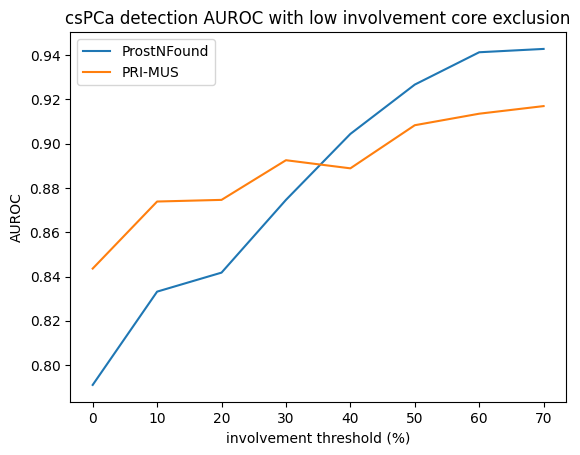

In [ ]:
# PRI-MUS vs. model AUC by involvement percent

import numpy as np


import json


model_score = "image_level_cancer_logits"
minimum_grade_group = 2


def get_metrics_model_vs_expert(
    model_score,
    minimum_grade_group,
    ai_model_outputs,
    pct_cancer_threshold=None,
    low_grade_exclusion_threshold=None,
):

    metrics = {}

    from sklearn.metrics import roc_auc_score

    table = get_cleaned_ua_metadata_table(
        filter_has_primus=True,
        filter_pct_cancer_threshold=pct_cancer_threshold,
        low_grade_exclusion_threshold=low_grade_exclusion_threshold,
    )
    table = table.join(ai_model_outputs, how="left")
    table = table.loc[~table[model_score].isna()]

    metrics["systematic_and_targeted_samples"] = dict(
        model_cspca_score_auc=roc_auc_score(
            table["grade_group"] > minimum_grade_group,
            table["image_level_cancer_logits"],
        ),
        model_heatmap_score_auc=roc_auc_score(
            table["grade_group"] > minimum_grade_group,
            table["average_needle_heatmap_value"],
        ),
        pri_mus_auc=roc_auc_score(
            table["grade_group"] > minimum_grade_group, table["PRI-MUS"]
        ),
    )

    table = get_cleaned_ua_metadata_table(
        filter_has_primus=True,
        filter_has_pirads=True,
        filter_pct_cancer_threshold=pct_cancer_threshold,
        low_grade_exclusion_threshold=low_grade_exclusion_threshold,
    )
    table = table.join(ai_model_outputs, how="left")
    table = table.loc[~table[model_score].isna()]

    metrics["pi_rads_targeted_samples"] = dict(
        model_cspca_score_auc=roc_auc_score(
            table["grade_group"] > minimum_grade_group,
            table["image_level_cancer_logits"],
        ),
        model_heatmap_score_auc=roc_auc_score(
            table["grade_group"] > minimum_grade_group,
            table["average_needle_heatmap_value"],
        ),
        pri_mus_auc=roc_auc_score(
            table["grade_group"] > minimum_grade_group, table["PRI-MUS"]
        ),
        pi_rads=roc_auc_score(
            table["grade_group"] > minimum_grade_group, table["PI-RADS"]
        ),
    )

    return metrics


metrics = {}
metrics["CSPCA-vs-nonCSPCA"] = get_metrics_model_vs_expert(
    "image_level_cancer_logits", 2, ai_model_outputs
)
metrics["PCa-vs-Benign"] = get_metrics_model_vs_expert(
    "image_level_cancer_logits", 0, ai_model_outputs
)

print(json.dumps(metrics, indent=2))


thresholds = []
model_aurocs = []
pri_mus_aurocs = []
hmap_score_aurocs = []

for threshold in range(0, 80, 10):
    metrics = get_metrics_model_vs_expert(
        "image_level_cancer_logits",
        2,
        ai_model_outputs,
        pct_cancer_threshold=threshold,
        low_grade_exclusion_threshold=None,
    )
    model_aurocs.append(
        metrics["systematic_and_targeted_samples"]["model_cspca_score_auc"]
    )
    pri_mus_aurocs.append(metrics["systematic_and_targeted_samples"]["pri_mus_auc"])
    thresholds.append(threshold)


import matplotlib.pyplot as plt

plt.plot(thresholds, model_aurocs, label="ProstNFound")
plt.plot(thresholds, pri_mus_aurocs, label="PRI-MUS")
plt.xlabel("involvement threshold (%)")
plt.ylabel("AUROC")
plt.title("csPCa detection AUROC with low involvement core exclusion")
plt.legend()

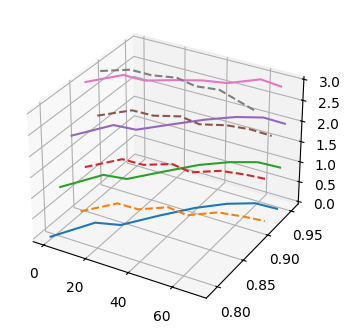

In [ ]:
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111, projection='3d')


grade_thresh = [0, 1, 2, 3]
auroc_pf = []
auroc_pri = []
involv = range(0, 80, 10)

for grade in grade_thresh:
        thresholds = []
        model_aurocs = []
        pri_mus_aurocs = []
        
        for threshold in range(0, 80, 10):
                metrics = get_metrics_model_vs_expert(
                        "image_level_cancer_logits",
                        2,
                        ai_model_outputs,
                        pct_cancer_threshold=threshold,
                        low_grade_exclusion_threshold=grade
                )
                model_aurocs.append(
                        metrics["systematic_and_targeted_samples"]["model_cspca_score_auc"]
                )
                pri_mus_aurocs.append(metrics["systematic_and_targeted_samples"]["pri_mus_auc"])
                thresholds.append(threshold)

        auroc_pf.append(model_aurocs)
        auroc_pri.append(pri_mus_aurocs)

                


for i,g in enumerate(grade_thresh):
    ax.plot(involv,                # x
            auroc_pf[i],           # y
            zs=g, zdir='z',        # fixed z-offset
            label=f'ProstNFound, g>{g*100:.0f}%')
    ax.plot(involv,
            auroc_pri[i],
            zs=g, zdir='z',
            linestyle='--',
            label=f'PRI-MUS, g>{g*100:.0f}%')



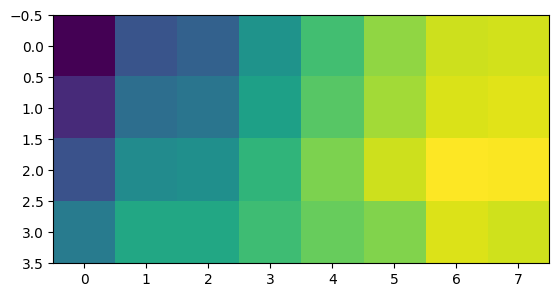

In [ ]:


plt.imshow(np.stack(auroc_pf))

(0.8, 1.0)

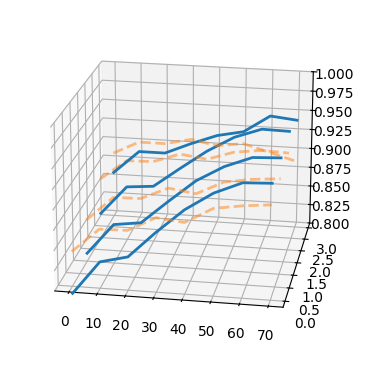

In [ ]:
fig = plt.figure(figsize=(6,4.5))
ax  = fig.add_subplot(projection='3d')
col = {'ProstNFound':'tab:blue', 'PRI-MUS':'tab:orange'}

for j, g in enumerate(grade_thresh):
    y_plane = np.full_like(involv, g)          # constant y for this slice

    # ProstNFound — solid blue
    ax.plot(involv, y_plane, auroc_pf[j],
            color=col['ProstNFound'],
            linewidth=2,
            label='ProstNFound' if j==0 else None)

    # PRI-MUS — dashed orange
    ax.plot(involv, y_plane, auroc_pri[j],
            color=col['PRI-MUS'],
            linestyle='--',
            linewidth=2,
            label='PRI-MUS' if j==0 else None, alpha=0.5)

ax.view_init(elev=20, azim=-80)
ax.set_zlim((0.80, 1))

In [ ]:
np.stack(auroc_pf).shape

(4, 8)

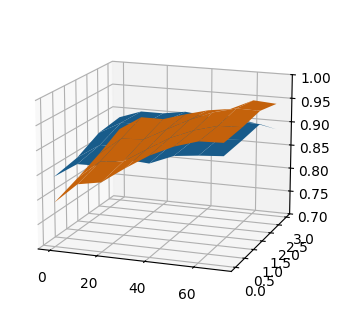

In [ ]:
fig = plt.figure(figsize=(6,4))


X, Y = np.meshgrid(thresholds, grade_thresh)

ax  = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, np.stack(auroc_pri))
ax.plot_surface(
    X, Y, np.stack( auroc_pf)
)

ax.set_zlim(0.7, 1.0)
ax.view_init(elev=15, azim=-70)

In [ ]:
score = 'average_needle_heatmap_value'
table['err'] = (table[score] - table['pct_cancer'] / 100).abs()

In [ ]:
table['cspca_model_err'] = (table['image_level_cancer_logits'] - (table['grade_group'] > 2).astype(float)).abs()
table['cspca_primus_err'] = (table['PRI-MUS'] / 5 - (table['grade_group'] > 2).astype(float)).abs()

In [ ]:
table['primus_positive'] = table['PRI-MUS'] > 2
table['cspca_positive'] = table['grade_group'] > 2

<Axes: >

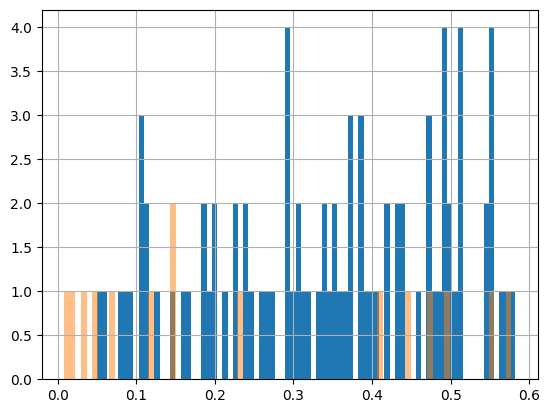

In [ ]:
table.loc[table['primus_positive'] & table['cspca_positive']].image_level_cancer_logits.hist(label='PRIMUS TP', bins=80)
table.loc[~table['primus_positive'] & table['cspca_positive']].image_level_cancer_logits.hist(label='PRIMUS_FN', bins=80, alpha=0.5)


In [ ]:
table.loc[~table['primus_positive'] & table['cspca_positive']].sort_values(by='image_level_cancer_logits')

,center,patient_id,isBiopsy,isFusionVu,hasFusionVuOverlay,bimg_path,cine_number,length,heightMm,heightPixel,...,study_arm,average_needle_heatmap_value,image_level_cancer_logits,involvement,binned_model_cspca_score,err,cspca_model_err,cspca_primus_err,primus_positive,cspca_positive
core_id,,,,,,,,,,,,,,,,,,,,,
UA-048-019,UA,UA-048,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,19.0,60.0,48.0,962.0,...,Arm3-MicroUS-MRI,0.017162,0.008392,0.10,1,0.082838,0.991608,0.6,False,True
UA-036-011,UA,UA-036,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,11.0,60.0,28.0,962.0,...,Arm3-MicroUS-MRI,0.007813,0.016700,0.05,1,0.042187,0.983300,0.8,False,True
UA-048-018,UA,UA-048,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,18.0,60.0,48.0,962.0,...,Arm3-MicroUS-MRI,0.049282,0.033823,0.50,2,0.450718,0.966177,0.6,False,True
UA-017-013,UA,UA-017,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,13.0,60.0,28.0,962.0,...,Arm3-MicroUS-MRI,0.044724,0.048785,0.05,2,0.005276,0.951215,0.6,False,True
UA-062-017,UA,UA-062,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,17.0,60.0,28.0,962.0,...,Arm3-MicroUS-MRI,0.024239,0.069769,0.05,2,0.025761,0.930231,0.6,False,True
UA-079-011,UA,UA-079,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,11.0,60.0,28.0,962.0,...,Arm3-MicroUS-MRI,0.104892,0.121922,0.40,2,0.295108,0.878078,0.6,False,True
UA-011-013,UA,UA-011,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,13.0,60.0,28.0,962.0,...,Arm3-MicroUS-MRI,0.124480,0.147747,0.25,2,0.125520,0.852253,0.6,False,True
UA-099-005,UA,UA-099,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,Arm1-MicroUS-Only,0.102545,0.150119,0.25,2,0.147455,0.849881,0.6,False,True
UA-130-008,UA,UA-130,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,Arm1-MicroUS-Only,0.108329,0.233387,0.10,3,0.008329,0.766613,0.6,False,True


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='grade_group'>

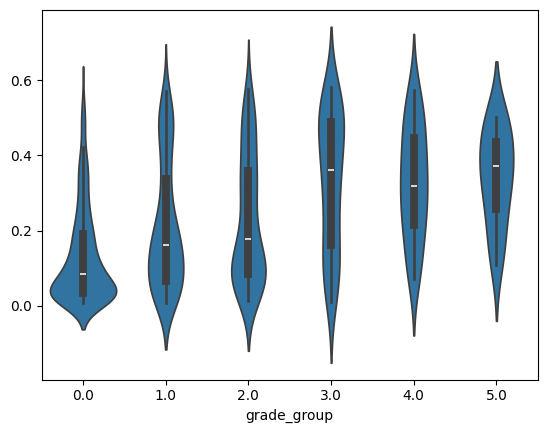

In [ ]:
import seaborn as sns
human_scores = table['PRI-MUS']
import torch
model_scores = table['image_level_cancer_logits'].values
grade = table['grade_group']
sns.violinplot(x=grade, y=model_scores)
#sns.violinplot(x=grade, y=human_scores)
#sns.stripplot(x=human_scores, y=model_scores, color='black', jitter=True, alpha=0.3)

Text(0.5, 0, 'Average heatmap activation in needle region (%)')

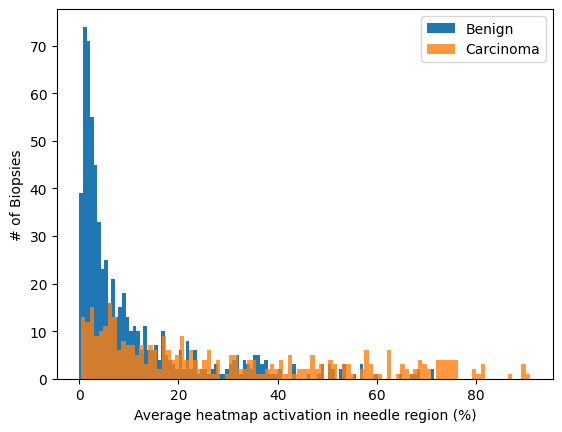

In [ ]:
plt.hist(table.loc[table['Diagnosis'] == "Benign", 'average_needle_heatmap_value'] * 100, label='Benign', bins=100)
plt.hist(
    table.loc[table['Diagnosis'] == 'Carcinoma', 'average_needle_heatmap_value'] * 100, label='Carcinoma', bins=100, alpha=0.8
)
plt.legend()
plt.ylabel('# of Biopsies')
plt.xlabel('Average heatmap activation in needle region (%)')


Text(0, 0.5, 'Average heatmap activation for needle trace')

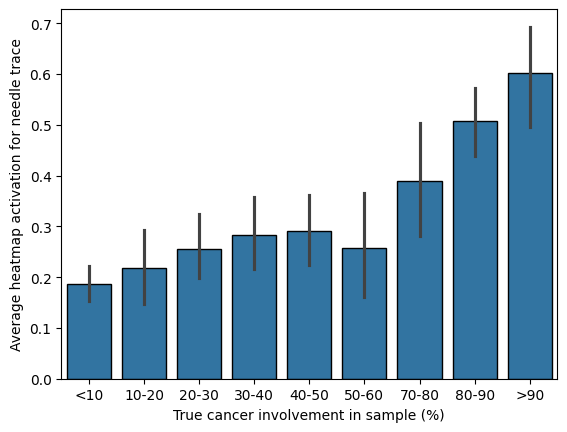

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
human_scores = table['PRI-MUS']
model_scores = table['average_needle_heatmap_value']
involvement_bin = pd.cut(
    table['pct_cancer'], bins=np.arange(0, 100, 10), labels=["<10", "10-20", "20-30", "30-40", "40-50", "50-60", "70-80", "80-90", ">90"]
)
sns.barplot(
    x=involvement_bin, y=model_scores, ec='black'
)
plt.xlabel("True cancer involvement in sample (%)")
plt.ylabel("Average heatmap activation for needle trace")
# sns.stripplot(x=involvement_bin, y=model_scores, color='black', jitter=True, alpha=0.3)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Average risk score by grade group for PRI-MUS vs. ProstNFound')

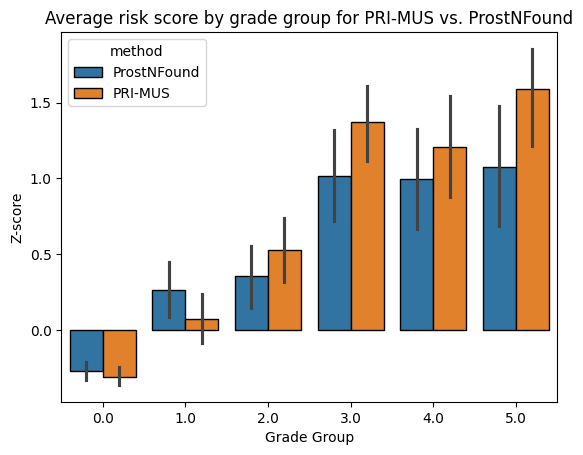

In [ ]:
new_table = pd.DataFrame()


#table['model_score_'] = table['image_level_cancer_logits_normali']

def add_zscore(colname): 
    col = table[colname]
    table[f"{colname}_zscore"] = (col - col.mean()) / col.std()

add_zscore('image_level_cancer_logits')
add_zscore('PRI-MUS')

for column in ['image_level_cancer_logits_zscore', 'PRI-MUS_zscore']: 
    new_df = pd.DataFrame()
    new_df['Grade Group'] = table['grade_group'].values
    new_df['Z-score'] = table[column].values
    #new_df['score'] -= new_df['score'].min()
    #new_df['score'] /= new_df['score'].max() 
    new_df['method'] = 'PRI-MUS' if 'PRI-MUS' in column else "ProstNFound"
    #new_df.loc['method', :] = column
    new_table = pd.concat([new_table, new_df])

new_table = new_table.reset_index(drop=True)

sns.barplot(
    data=new_table, hue='method', x='Grade Group', y='Z-score',ec='black'
)
plt.title("Average risk score by grade group for PRI-MUS vs. ProstNFound")

/tmp/ipykernel_16062/251199325.py:54: RuntimeWarning: invalid value encountered in divide
  return {k: 100 * np.array(v) / total for k, v in d.items()}, total


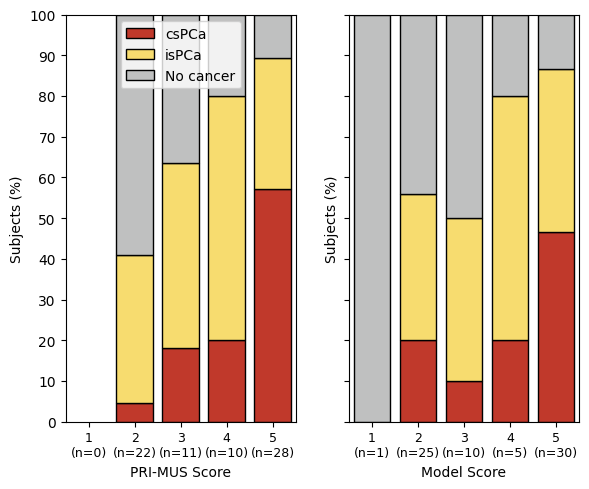

In [ ]:
def get_patient_table(table):
    table_patient = table.groupby("patient_id")[
    ["PRI-MUS", "binned_model_cspca_score", "grade_group", "PI-RADS"]
    ].max()

    def get_cspca_status(g):
        if g == 0:
            return "none"
        elif g < 3:
            return "isPCa"
        else:
            return "csPCa"


    table_patient["status"] = table_patient["grade_group"].apply(get_cspca_status)
    return table_patient


table_patient = table.groupby("patient_id")[
    ["PRI-MUS", "binned_model_cspca_score", "grade_group", "PI-RADS"]
].max()

def get_cspca_status(g):
    if g == 0:
        return "none"
    elif g < 3:
        return "isPCa"
    else:
        return "csPCa"


table_patient["status"] = table_patient["grade_group"].apply(get_cspca_status)
statuses = "none", "isPCa", "csPCa"
groups = [1.0, 2.0, 3.0, 4.0, 5.0]

# raw counts by score
counts = table_patient.groupby("status")["PRI-MUS"].value_counts()
pri_mus = {
    status: [counts[status].get(grade, 0) for grade in groups] for status in statuses
}
counts = table_patient.groupby("status")["PI-RADS"].value_counts()
pi_rads = {
    status: [counts[status].get(grade, 0) for grade in groups] for status in statuses
}
counts = table_patient.groupby("status")["binned_model_cspca_score"].value_counts()
model = {
    status: [counts[status].get(grade, 0) for grade in groups] for status in statuses
}


# ---------- 2. Convenience: convert to % ----------
def to_percent(d):
    total = np.sum(list(d.values()), axis=0)
    return {k: 100 * np.array(v) / total for k, v in d.items()}, total


pri_pct, pri_n = to_percent(pri_mus)
pir_pct, pir_n = to_percent(pi_rads)
mod_pct, mod_n = to_percent(model)


# ---------- 3. Plot helpers ----------
order = ["csPCa", "isPCa", "none"]
colors = {
    "csPCa": "#c0392b",  # dark red
    "isPCa": "#f7dc6f",  # light yellow
    "none": "#bfc0c0",
}  # light grey
labels = {"csPCa": "csPCa", "isPCa": "isPCa", "none": "No cancer"}


def stacked(ax, pct_dict, n_totals, title, xlbl):
    bottoms = np.zeros_like(n_totals, dtype=float)
    for cat in order:
        ax.bar(
            np.arange(1, 6),
            pct_dict[cat],
            bottom=bottoms,
            color=colors[cat],
            edgecolor="black",
            linewidth=1,
            label=labels[cat] if ax is axs[0] else None,
        )
        bottoms += pct_dict[cat]

    ax.set_xlim(0.5, 5.5)
    ax.set_ylim(0, 10)
    ax.set_title(title, pad=12)
    ax.set_ylabel("Subjects (%)")
    ax.set_xlabel(xlbl)
    ax.set_xticks(range(1, 6))
    # format tick labels with sample sizes
    ax.set_xticklabels(
        [f"{s}\n(n={n})" for s, n in zip(range(1, 6), n_totals)], fontsize=9
    )
    ax.set_yticks(range(0, 110, 10))


# ---------- 4. Draw ----------
fig, axs = plt.subplots(1, 2, figsize=(6, 5), sharey=True)

stacked(axs[0], pri_pct, pri_n, "", "PRI-MUS Score")
stacked(axs[1], mod_pct, mod_n, "", "Model Score")
#stacked(axs[1], pir_pct, pir_n, "", "PI-RADS Score")

axs[0].legend(frameon=True, fontsize=10, loc="upper center", )
plt.tight_layout(w_pad=2)
plt.show()

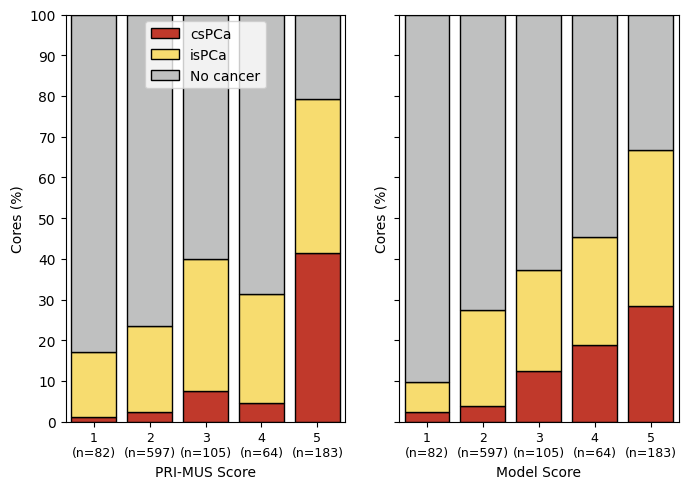

In [ ]:
# Core level of the same thing

def get_cspca_status(g):
    if g == 0:
        return "none"
    elif g < 3:
        return "isPCa"
    else:
        return "csPCa"


table["status"] = table["grade_group"].apply(get_cspca_status)
statuses = "none", "isPCa", "csPCa"
groups = [1.0, 2.0, 3.0, 4.0, 5.0]

# raw counts by score
counts = table.groupby("status")["PRI-MUS"].value_counts()
pri_mus = {
    status: [counts[status].get(grade, 0) for grade in groups] for status in statuses
}
counts = table.groupby("status")["PI-RADS"].value_counts()
pi_rads = {
    status: [counts[status].get(grade, 0) for grade in groups] for status in statuses
}
counts = table.groupby("status")["binned_model_cspca_score"].value_counts()
model = {
    status: [counts[status].get(grade, 0) for grade in groups] for status in statuses
}


# ---------- 2. Convenience: convert to % ----------
def to_percent(d):
    total = np.sum(list(d.values()), axis=0)
    return {k: 100 * np.array(v) / total for k, v in d.items()}, total


pri_pct, pri_n = to_percent(pri_mus)
pir_pct, pir_n = to_percent(pi_rads)
mod_pct, mod_n = to_percent(model)


# ---------- 3. Plot helpers ----------
order = ["csPCa", "isPCa", "none"]
colors = {
    "csPCa": "#c0392b",  # dark red
    "isPCa": "#f7dc6f",  # light yellow
    "none": "#bfc0c0",
}  # light grey
labels = {"csPCa": "csPCa", "isPCa": "isPCa", "none": "No cancer"}


def stacked(ax, pct_dict, n_totals, title, xlbl):
    bottoms = np.zeros_like(n_totals, dtype=float)
    for cat in order:
        ax.bar(
            np.arange(1, 6),
            pct_dict[cat],
            bottom=bottoms,
            color=colors[cat],
            edgecolor="black",
            linewidth=1,
            label=labels[cat] if ax is axs[0] else None,
        )
        bottoms += pct_dict[cat]

    ax.set_xlim(0.5, 5.5)
    ax.set_ylim(0, 10)
    ax.set_title(title, pad=12)
    ax.set_ylabel("Cores (%)")
    ax.set_xlabel(xlbl)
    ax.set_xticks(range(1, 6))
    # format tick labels with sample sizes
    ax.set_xticklabels(
        [f"{s}\n(n={n})" for s, n in zip(range(1, 6), n_totals)], fontsize=9
    )
    ax.set_yticks(range(0, 110, 10))


# ---------- 4. Draw ----------
fig, axs = plt.subplots(1, 2, figsize=(7, 5), sharey=True)

stacked(axs[0], pri_pct, pri_n, "", "PRI-MUS Score")
stacked(axs[1], mod_pct, mod_n, "", "Model Score")
#stacked(axs[1], pir_pct, pir_n, "", "PI-RADS Score")

axs[0].legend(frameon=True, fontsize=10, loc="upper center", )
plt.tight_layout(w_pad=2)
plt.show()

In [ ]:
pri_mus

{'none': [68, 456, 63, 44, 38],
 'isPCa': [13, 127, 34, 17, 69],
 'csPCa': [1, 14, 8, 3, 76]}

In [ ]:
counts['No Cancer'].get(2, 0)

KeyError: 'No Cancer'

In [ ]:
table.columns

Index(['center', 'patient_id', 'isBiopsy', 'isFusionVu', 'hasFusionVuOverlay',
       'bimg_path', 'cine_number', 'length', 'heightMm', 'heightPixel',
       'widthMm', 'widthPixel', 'createdDate', 'Sample ID', 'Cine #',
       'PRI-MUS', 'PI-RADS', 'Notes', 'Number of Samples', 'Core Length',
       'Diagnosis', 'grade_group', 'pct_cancer', '% P4', 'P Inv', 'IDC',
       'Cribiform', 'Inflamm', 'HGPIN', 'Atypia', 'PATH Notes', 'PATH ID',
       'case_path', 'age', 'psa', 'study_arm', 'average_needle_heatmap_value',
       'image_level_cancer_logits', 'involvement', 'binned_model_cspca_score'],
      dtype='object')

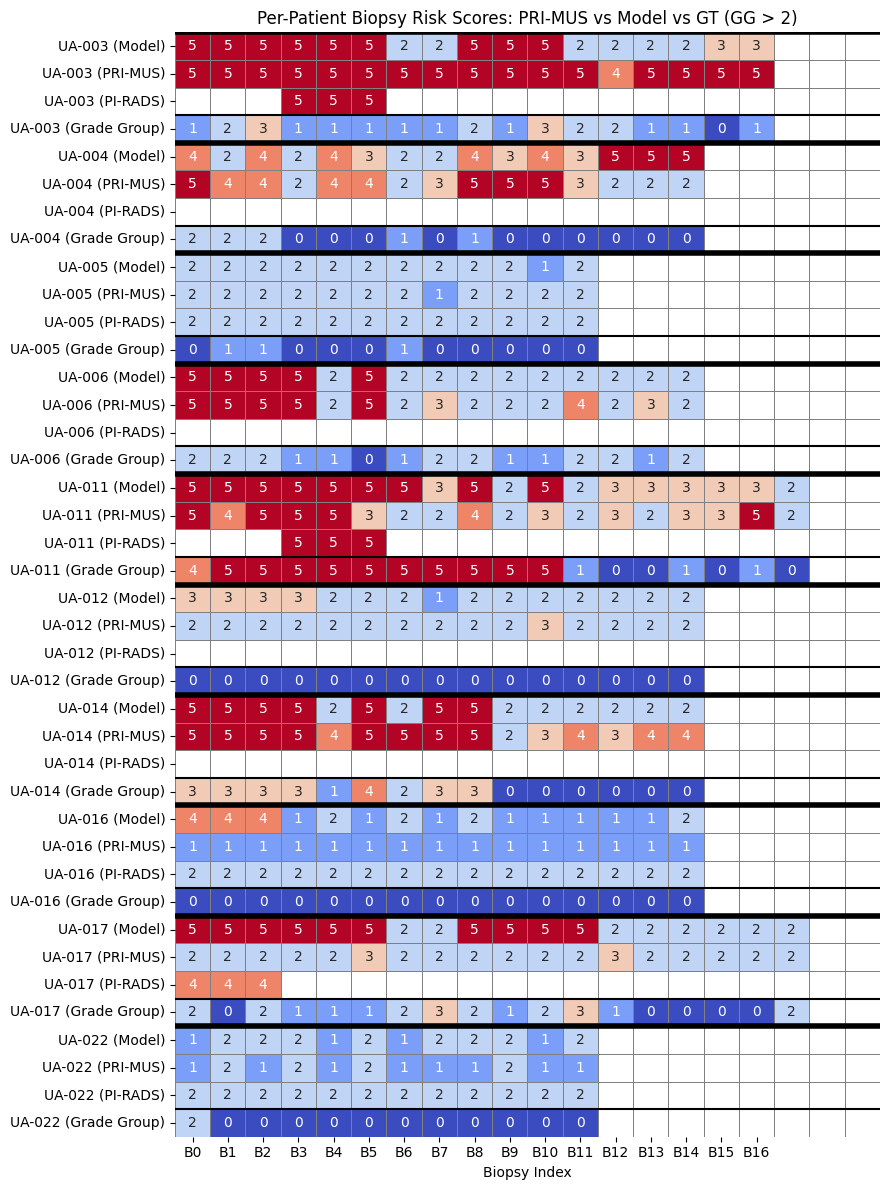

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ── Normalize model output ─────────────────────────────────────
table['image_level_cancer_logits'] -= table['image_level_cancer_logits'].min()
table['image_level_cancer_logits'] /= table['image_level_cancer_logits'].max()

def plot_per_patient_risk_maps(df, num_patients=None):
    unique_patients = df['patient_id'].unique()
    if num_patients is not None:
        unique_patients = unique_patients[:num_patients]

    n_cols = 20
    n_rows = len(unique_patients) * 4  # 3 rows: Human, Model, Binary GT

    heatmap_data = np.full((n_rows, n_cols), np.nan)
    row_labels = []

    for i, pid in enumerate(unique_patients):
        sub_df = df[df['patient_id'] == pid].sort_values('core_id')

        # Normalize input scores
        human_scores = (sub_df['PRI-MUS'].values)
        # model_scores = sub_df['image_level_cancer_logits'].values * 5
        model_scores = sub_df['binned_model_cspca_score']
        pi_rads = sub_df['PI-RADS'].values

        # Binarize ground truth (GG > 2)
        gt_scores = (sub_df['grade_group'].values).astype(float)

        heatmap_data[i*4+1, :len(model_scores)] = model_scores
        heatmap_data[i*4,   :len(human_scores)] = human_scores
        heatmap_data[i*4+2, :len(gt_scores)]    = pi_rads
        heatmap_data[i*4+3, :len(pi_rads)] = gt_scores

        row_labels.append(f"{pid} (Model)")
        row_labels.append(f"{pid} (PRI-MUS)")
        row_labels.append(f"{pid} (PI-RADS)")
        row_labels.append(f"{pid} (Grade Group)")

    # ── Plot heatmap ──────────────────────────────────────────────
    n_cols = 17
    plt.figure(figsize=(9, 0.3 * n_rows))

    # Use 2D mask for per-row colormap if desired later
    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".0f",
        cmap="coolwarm",
        vmin=0, vmax=5,
        cbar=False,
        linewidths=0.5,
        linecolor='gray',
        xticklabels=[f"B{i}" for i in range(n_cols)],
        yticklabels=row_labels
    )

    # Bold horizontal lines between patients
    # for y in range(1, n_rows, 4):
    #     ax.axhline(y, color='black', lw=1.5)
    for y in range(0, n_rows, 4):
        ax.axhline(y, color='black', lw=4)
    for y in range(3, n_rows, 4):
        ax.axhline(y, color='black', lw=1.5)

    ax.set_title("Per-Patient Biopsy Risk Scores: PRI-MUS vs Model vs GT (GG > 2)")
    ax.set_xlabel("Biopsy Index")
    #ax.set_ylabel("Patient (Score Type)")
    plt.tight_layout()

# ── Call ───────────────────────────────────────────────────────
plot_per_patient_risk_maps(table, num_patients=10)
#plt.savefig('/h/pwilson/projects/medAI/projects/prostnfound/logs/test/prostnfound_plus_final/optimum/per_patient_risk_maps.png')

           binned_model_cspca_score
core_id                            
UA-012-005                        2
UA-012-006                        2
UA-012-007                        2
UA-012-008                        2
UA-012-009                        2
UA-012-010                        2
UA-012-011                        2
UA-012-012                        2
UA-012-013                        2
UA-012-014                        2
UA-012-015                        3
UA-012-016                        2
UA-012-017                        2
UA-012-018                        2
UA-012-019                        2
           binned_model_cspca_score
core_id                            
UA-016-004                        1
UA-016-005                        1
UA-016-006                        1
UA-016-007                        1
UA-016-008                        1
UA-016-009                        1
UA-016-010                        1
UA-016-011                        1
UA-016-012                  

Text(0.5, 1.0, 'csPCa')

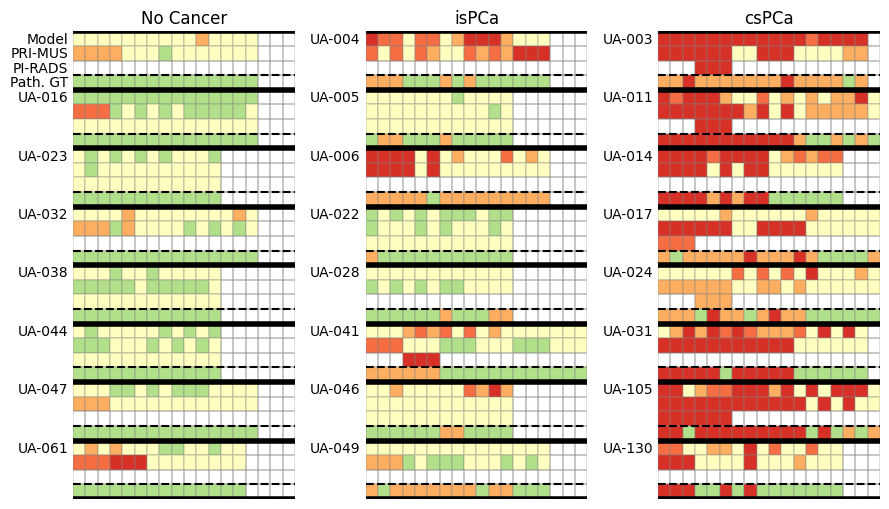

In [ ]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ── Normalize model output ─────────────────────────────────────
table['image_level_cancer_logits'] -= table['image_level_cancer_logits'].min()
table['image_level_cancer_logits'] /= table['image_level_cancer_logits'].max()

def plot_per_patient_risk_maps(df, num_patients=None, ax=None, max_cols=20, add_legend=True, add_pid=False):
    unique_patients = df['patient_id'].unique()
    if num_patients is not None:
        unique_patients = unique_patients[:num_patients]

    n_cols = max_cols
    n_rows = len(unique_patients) * 4  # 3 rows: Human, Model, Binary GT

    heatmap_data = np.full((n_rows, n_cols), np.nan)
    row_labels = []

    for i, pid in enumerate(unique_patients):
        sub_df = df[df['patient_id'] == pid].sort_values('core_id')

        # Normalize input scores
        human_scores = (sub_df['PRI-MUS'].values)
        # model_scores = sub_df['image_level_cancer_logits'].values * 5
        model_scores = sub_df['binned_model_cspca_score']
        pi_rads = sub_df['PI-RADS'].values

        # Binarize ground truth (GG > 2)
        def gg_to_color(gg): 
            if gg == 0: return 1
            elif gg < 3: return 3
            else: return 5
        
        gt_scores = (sub_df['grade_group'].apply(gg_to_color).values).astype(float)
    
        print(sub_df[['binned_model_cspca_score']])
        heatmap_data[i*4, :len(model_scores)] = model_scores
        heatmap_data[i*4+1,   :len(human_scores)] = human_scores
        heatmap_data[i*4+2, :len(pi_rads)]    = pi_rads
        heatmap_data[i*4+3, :len(gt_scores)] = gt_scores

        if i == 0 and add_legend:
            row_labels.append(f"Model")
            row_labels.append(f"PRI-MUS")
            row_labels.append(f"PI-RADS")
            row_labels.append(f"Path. GT")
        elif add_pid:
            row_labels.append(pid)
            row_labels.extend([""] * 3)
        else:  
            row_labels.extend([""] * 4)

        # row_labels.append(pid)     # first slice gets the ID
        # row_labels.extend(['', '', ''])          # the other three are blank

    # ── Plot heatmap ──────────────────────────────────────────────
    if ax is None: 
        plt.figure(figsize=(4 / 20 * max_cols, 0.15 * n_rows))
        ax = plt.gca()

    from matplotlib.colors import ListedColormap, BoundaryNorm
    # 1. build the discrete cmap + matching norm
    risk_colors = ['#b2df8a',  # 1
                '#ffffbf',  # 2
                '#fdae61',  # 3
                '#f46d43',  # 4
                '#d73027']  # 5

    cmap = ListedColormap(risk_colors, name='risk_cmap')
    bounds = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]      # 6 edges for 5 bins
    norm   = BoundaryNorm(bounds, cmap.N)

    import matplotlib.colors as mcolors
    rgba_gray = mcolors.to_rgba("gray", 0.25)

    # Use 2D mask for per-row colormap if desired later
    ax = sns.heatmap(
        heatmap_data,
        annot=False,
        fmt=".0f",
        cmap=cmap, norm=norm,
        vmin=1, vmax=5,
        cbar=False,
        linewidths=.01,
        linecolor=rgba_gray,
        xticklabels=[f"B{i}" for i in range(n_cols)],
        yticklabels=row_labels, 
        ax=ax,
    )
    ax.set_yticklabels(
        ax.get_yticklabels(), rotation=0,
    )

    # Bold horizontal lines between patients
    # for y in range(1, n_rows, 4):
    #     ax.axhline(y, color='black', lw=1.5)
    for y in range(0, n_rows + 4, 4):
        ax.axhline(y, color='black', lw=4)
    for y in range(3, n_rows + 4, 4):
        ax.axhline(y, color='black', lw=1.5, ls='--')

    ax.set_xticks([])
    ax.tick_params(axis='y',          # vertical axis
        which='both',      # major & minor ticks
        length=0, )          # 0-length → label stays, dash disappears
    #ax.set_title("Per-Patient Biopsy Risk Scores: PRI-MUS vs Model vs GT (GG > 2)")
    # ax.set_xlabel("Biopsy Index")
    #ax.set_ylabel("Patient (Score Type)")
    plt.tight_layout()

# ── Call ───────────────────────────────────────────────────────

#plt.savefig('/h/pwilson/projects/medAI/projects/prostnfound/logs/test/prostnfound_plus_final/optimum/per_patient_risk_maps.png')


def get_patient_table(table):
    table_patient = table.groupby("patient_id")[
    ["PRI-MUS", "binned_model_cspca_score", "grade_group", "PI-RADS"]
    ].max()

    def get_cspca_status(g):
        if g == 0:
            return "none"
        elif g < 3:
            return "isPCa"
        else:
            return "csPCa"

    table_patient["status"] = table_patient["grade_group"].apply(get_cspca_status)
    return table_patient



def get_patients_with_status(status):
    ptab = get_patient_table(table)
    ptab = ptab.loc[ptab['status'] == status]
    return ptab.index.unique()




def select_subtable_with_force_include_patients(table, necessary_patients):
    all_patients = table.patient_id.unique().tolist()
    force_include_patients_for_table = [patient for patient in necessary_patients if patient in table.patient_id.unique()]
    num_patients = 8

    patients = all_patients[:num_patients]
    ptr = -1 
    for patient in force_include_patients_for_table: 
        if patient in patients: 
            continue
        else: 
            patients[ptr] = patient 
            ptr -= 1 

    table = table.loc[table['patient_id'].isin(patients)]
    return table


fig, ax = plt.subplots(1, 3, figsize=(9, .13 * 40))
necessary_patients = ["UA-061", "UA-011", "UA-006", "UA-105", "UA-130"]

table_ = select_subtable_with_force_include_patients(table.loc[table['patient_id'].isin(get_patients_with_status('none'))], necessary_patients)
plot_per_patient_risk_maps(table_, num_patients=8, max_cols=18, ax=ax[0], add_pid=True)
ax[0].set_title('No Cancer')
table_ = select_subtable_with_force_include_patients(table.loc[table['patient_id'].isin(get_patients_with_status('isPCa'))], necessary_patients)
plot_per_patient_risk_maps(table_, num_patients=8, max_cols=18, ax=ax[1], add_legend=False, add_pid=True)
ax[1].set_title("isPCa")
table_ = select_subtable_with_force_include_patients(table.loc[table['patient_id'].isin(get_patients_with_status('csPCa'))], necessary_patients)
plot_per_patient_risk_maps(table_, num_patients=8, max_cols=18, ax=ax[2], add_legend=False, add_pid=True)
ax[2].set_title('csPCa')


In [ ]:
table_

,center,patient_id,isBiopsy,isFusionVu,hasFusionVuOverlay,bimg_path,cine_number,length,heightMm,heightPixel,...,involvement,binned_model_cspca_score,err,cspca_model_err,cspca_primus_err,primus_positive,cspca_positive,image_level_cancer_logits_zscore,PRI-MUS_zscore,status
core_id,,,,,,,,,,,,,,,,,,,,,
UA-012-005,UA,UA-012,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,0.0,2,0.040796,0.020541,0.6,True,False,-0.974212,0.256412,none
UA-012-006,UA,UA-012,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,962.0,...,0.0,2,0.031810,0.019746,0.6,True,False,-0.979321,0.256412,none
UA-012-007,UA,UA-012,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,7.0,60.0,28.0,962.0,...,0.0,2,0.065144,0.039589,0.6,True,False,-0.851840,0.256412,none
UA-012-008,UA,UA-012,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,0.0,2,0.057403,0.036916,0.6,True,False,-0.869013,0.256412,none
UA-012-009,UA,UA-012,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,0.0,2,0.016908,0.038156,0.4,False,False,-0.861043,-0.542260,none
UA-012-010,UA,UA-012,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,10.0,60.0,28.0,962.0,...,0.0,2,0.093774,0.112613,0.4,False,False,-0.382699,-0.542260,none
UA-012-011,UA,UA-012,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,11.0,60.0,28.0,962.0,...,0.0,2,0.016831,0.023210,0.4,False,False,-0.957064,-0.542260,none
UA-061-005,UA,UA-061,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,0.0,2,0.131259,0.125943,0.8,True,False,-0.297060,1.055083,none
UA-061-006,UA,UA-061,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,962.0,...,0.0,3,0.353972,0.259447,0.8,True,False,0.560627,1.055083,none


In [ ]:
num_patients_head

7

In [ ]:
table_.patient_id

core_id
UA-003-005    UA-003
UA-003-006    UA-003
UA-003-007    UA-003
UA-003-008    UA-003
UA-003-009    UA-003
UA-003-010    UA-003
UA-003-011    UA-003
UA-061-005    UA-061
UA-061-006    UA-061
UA-061-007    UA-061
UA-061-008    UA-061
UA-061-009    UA-061
UA-061-010    UA-061
UA-061-011    UA-061
UA-061-012    UA-061
UA-061-013    UA-061
UA-061-014    UA-061
UA-061-015    UA-061
UA-061-016    UA-061
UA-061-017    UA-061
UA-061-018    UA-061
Name: patient_id, dtype: object

In [ ]:
force_include_cores_for_table

['UA-061']

In [ ]:
table_

,center,patient_id,isBiopsy,isFusionVu,hasFusionVuOverlay,bimg_path,cine_number,length,heightMm,heightPixel,...,involvement,binned_model_cspca_score,err,cspca_model_err,cspca_primus_err,primus_positive,cspca_positive,image_level_cancer_logits_zscore,PRI-MUS_zscore,status
core_id,,,,,,,,,,,,,,,,,,,,,
UA-003-005,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,0.50,5,0.221861,0.517930,1.0,True,False,2.221237,1.853755,isPCa
UA-003-006,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,962.0,...,0.30,5,0.052760,0.421996,1.0,True,False,1.604917,1.853755,isPCa
UA-003-007,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,7.0,60.0,28.0,962.0,...,0.30,5,0.280911,0.509430,0.0,True,True,2.045467,1.853755,csPCa
UA-003-008,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,0.40,5,0.131472,0.388130,1.0,True,False,1.387347,1.853755,isPCa
UA-003-009,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,0.50,5,0.262613,0.512172,1.0,True,False,2.184250,1.853755,isPCa
UA-003-010,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,10.0,60.0,28.0,962.0,...,0.95,5,0.050400,0.532697,1.0,True,False,2.316111,1.853755,isPCa
UA-003-011,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,11.0,60.0,28.0,962.0,...,0.50,5,0.303128,0.491246,0.4,False,False,2.049811,-0.542260,isPCa
UA-061-005,UA,UA-061,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,0.00,2,0.131259,0.125943,0.8,True,False,-0.297060,1.055083,none
UA-061-006,UA,UA-061,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,962.0,...,0.00,3,0.353972,0.259447,0.8,True,False,0.560627,1.055083,none


           binned_model_cspca_score
core_id                            
UA-012-005                        2
UA-012-006                        2
UA-012-007                        2
UA-012-008                        2
UA-012-009                        2
UA-012-010                        2
UA-012-011                        2
UA-012-012                        2
UA-012-013                        2
UA-012-014                        2
UA-012-015                        3
UA-012-016                        2
UA-012-017                        2
UA-012-018                        2
UA-012-019                        2
           binned_model_cspca_score
core_id                            
UA-016-004                        1
UA-016-005                        1
UA-016-006                        1
UA-016-007                        1
UA-016-008                        1
UA-016-009                        1
UA-016-010                        1
UA-016-011                        1
UA-016-012                  

Text(0.5, 1.0, 'csPCa')

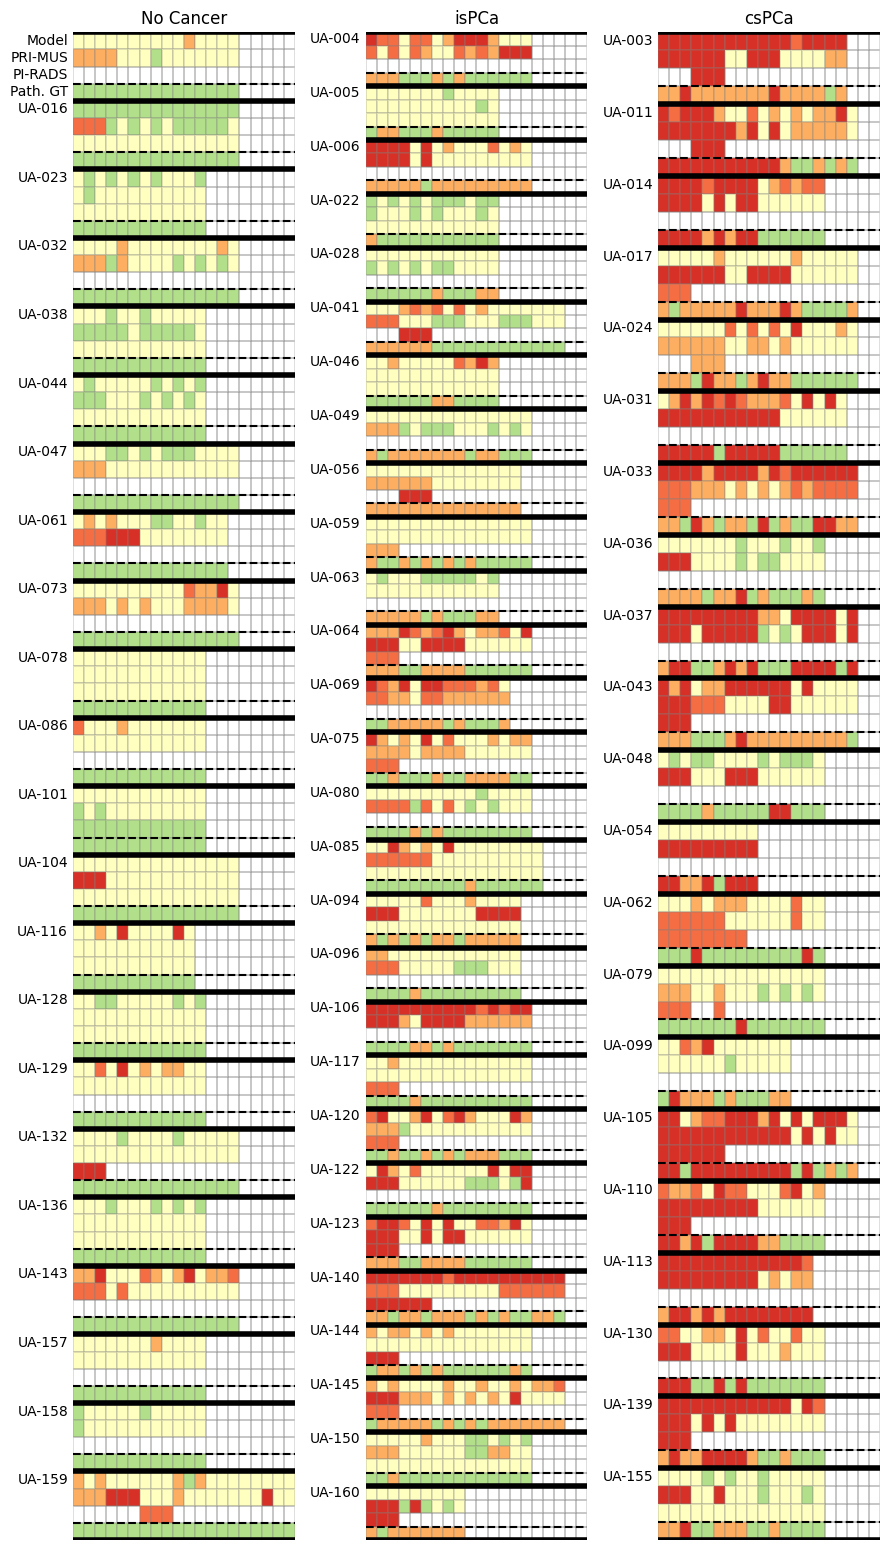

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(9, .13 * 120))
plot_per_patient_risk_maps(table.loc[table['patient_id'].isin(get_patients_with_status('none'))], num_patients=None, max_cols=20, ax=ax[0], add_pid=True)
ax[0].set_title('No Cancer')
plot_per_patient_risk_maps(table.loc[table['patient_id'].isin(get_patients_with_status('isPCa'))], num_patients=None, max_cols=20, ax=ax[1], add_legend=False, add_pid=True)
ax[1].set_title("isPCa")
plot_per_patient_risk_maps(table.loc[table['patient_id'].isin(get_patients_with_status('csPCa'))], num_patients=None, max_cols=20, ax=ax[2], add_legend=False, add_pid=True)
ax[2].set_title('csPCa')

In [ ]:
table.loc[table['patient_id'] == 'UA-038']['binned_model_cspca_score']

core_id
UA-038-004    2
UA-038-005    2
UA-038-006    2
UA-038-007    1
UA-038-008    2
UA-038-009    2
UA-038-010    1
UA-038-011    2
UA-038-012    2
UA-038-013    2
UA-038-014    2
UA-038-015    2
Name: binned_model_cspca_score, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
table

,center,patient_id,isBiopsy,isFusionVu,hasFusionVuOverlay,bimg_path,cine_number,length,heightMm,heightPixel,...,PATH ID,case_path,age,psa,study_arm,average_needle_heatmap_value,image_level_cancer_logits,involvement,binned_model_cspca_score,status
core_id,,,,,,,,,,,,,,,,,,,,,
UA-003-005,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,1.1,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.721861,0.888596,0.50,5,isPCa
UA-003-006,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,962.0,...,1.2,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.352760,0.722187,0.30,5,isPCa
UA-003-007,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,7.0,60.0,28.0,962.0,...,1.3,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.580911,0.841138,0.30,5,csPCa
UA-003-008,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,2.1,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.531472,0.663442,0.40,5,isPCa
UA-003-009,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,2.2,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0.762613,0.878610,0.50,5,isPCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UA-160-008,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,LMA,UA-160,68.0,5.9,Arm3-MicroUS-MRI,0.184895,0.280176,0.45,2,isPCa
UA-160-009,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,LLM,UA-160,68.0,5.9,Arm3-MicroUS-MRI,0.079140,0.111784,0.05,2,isPCa
UA-160-010,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,10.0,60.0,28.0,962.0,...,LMM,UA-160,68.0,5.9,Arm3-MicroUS-MRI,0.071826,0.138191,0.35,2,isPCa


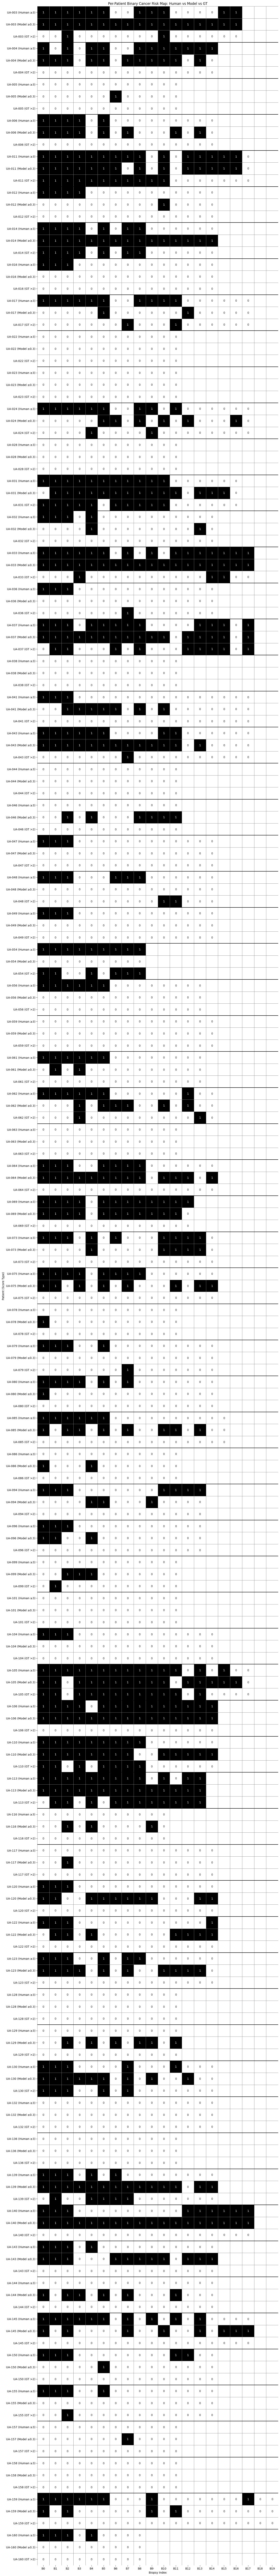

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ── Normalize model output ─────────────────────────────────────
table['image_level_cancer_logits'] -= table['image_level_cancer_logits'].min()
table['image_level_cancer_logits'] /= table['image_level_cancer_logits'].max()

def plot_per_patient_binarized_map(df, num_patients=None):
    unique_patients = df['patient_id'].unique()
    if num_patients is not None:
        unique_patients = unique_patients[:num_patients]

    n_cols = 20
    n_rows = len(unique_patients) * 3  # 3 rows per patient

    heatmap_data = np.full((n_rows, n_cols), np.nan)
    row_labels = []

    for i, pid in enumerate(unique_patients):
        sub_df = df[df['patient_id'] == pid].sort_values('core_id')

        # Binarize:
        human_scores  = (sub_df['PRI-MUS'].values >= 3).astype(float)
        model_scores  = (sub_df['image_level_cancer_logits'].values >= 0.3).astype(float)
        gt_scores     = (sub_df['grade_group'].values > 2).astype(float)

        heatmap_data[i*3,   :len(human_scores)] = human_scores
        heatmap_data[i*3+1, :len(model_scores)] = model_scores
        heatmap_data[i*3+2, :len(gt_scores)]    = gt_scores

        row_labels.append(f"{pid} (Human ≥3)")
        row_labels.append(f"{pid} (Model ≥0.3)")
        row_labels.append(f"{pid} (GT >2)")

    # ── Plot heatmap ──────────────────────────────────────────────
    plt.figure(figsize=(14, 0.6 * n_rows))

    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".0f",
        cmap="binary",
        vmin=0, vmax=1,
        cbar=False,
        linewidths=0.5,
        linecolor='gray',
        xticklabels=[f"B{i}" for i in range(n_cols)],
        yticklabels=row_labels
    )

    # Draw bold dividers between patients
    for y in range(3, n_rows, 3):
        ax.axhline(y, color='black', lw=1.5)

    ax.set_title("Per-Patient Binary Cancer Risk Map: Human vs Model vs GT")
    ax.set_xlabel("Biopsy Index")
    ax.set_ylabel("Patient (Score Type)")
    plt.tight_layout()
    plt.show()

# ── Call ───────────────────────────────────────────────────────
plot_per_patient_binarized_map(table, num_patients=None)


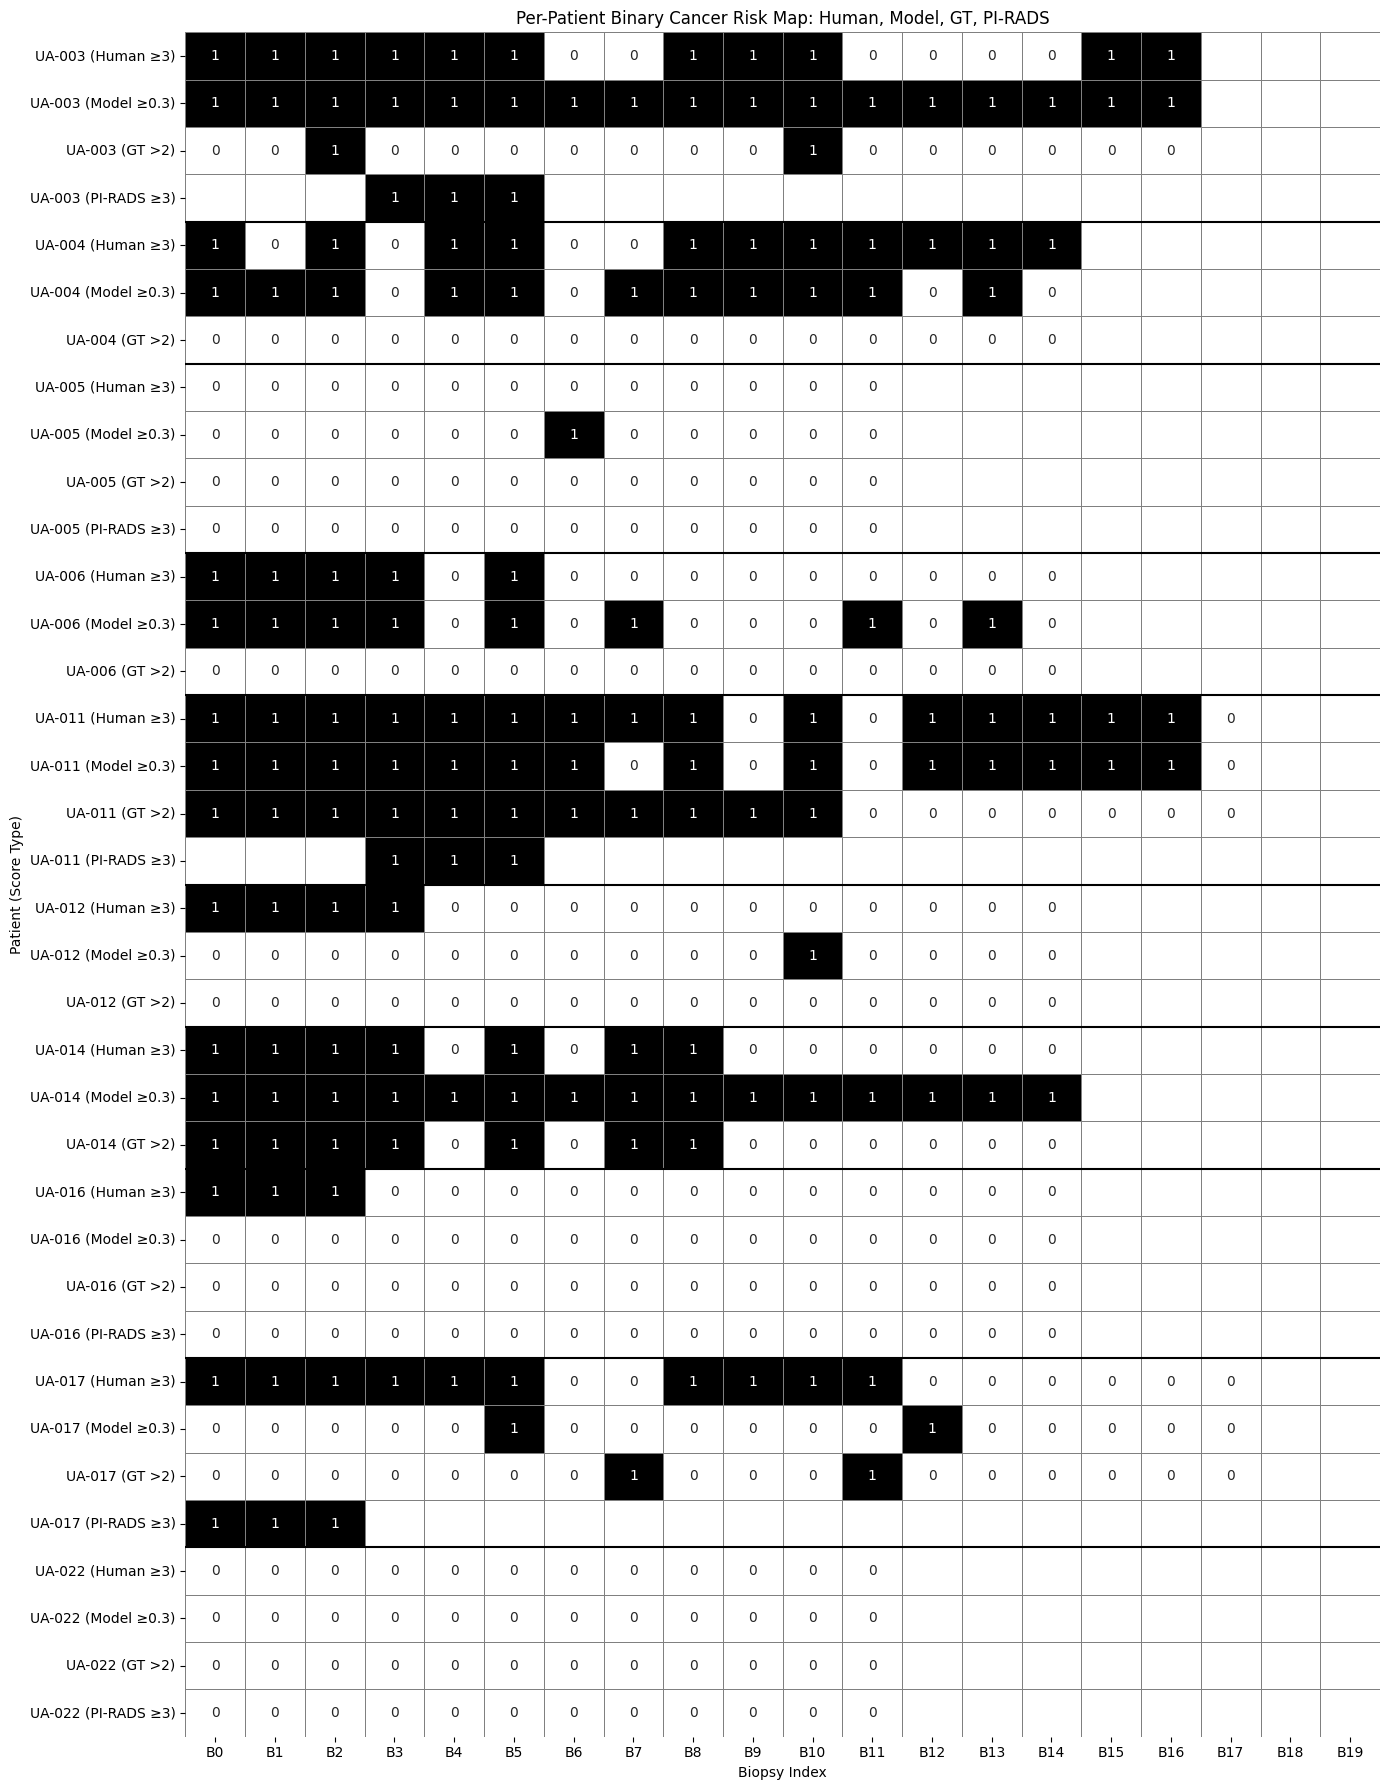

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ── Normalize model output ─────────────────────────────────────
table['image_level_cancer_logits'] -= table['image_level_cancer_logits'].min()
table['image_level_cancer_logits'] /= table['image_level_cancer_logits'].max()

def plot_per_patient_binary_map_with_pirads(df, num_patients=None):
    unique_patients = df['patient_id'].unique()
    if num_patients is not None:
        unique_patients = unique_patients[:num_patients]

    n_cols = 20
    row_blocks = []  # list of (labels, data rows) per patient

    for pid in unique_patients:
        sub_df = df[df['patient_id'] == pid].sort_values('core_id')

        # Binary indicators
        human_scores = (sub_df['PRI-MUS'].values >= 3).astype(float)
        model_scores = (sub_df['image_level_cancer_logits'].values >= 0.3).astype(float)
        gt_scores    = (sub_df['grade_group'].values > 2).astype(float)

        rows = [human_scores, model_scores, gt_scores]
        labels = [f"{pid} (Human ≥3)", f"{pid} (Model ≥0.3)", f"{pid} (GT >2)"]

        # Handle optional PI-RADS
        if 'PI-RADS' in sub_df.columns and sub_df['PI-RADS'].notna().any():
            pirads_bin = np.full_like(human_scores, np.nan)
            valid_mask = sub_df['PI-RADS'].notna().values
            pirads_bin[valid_mask] = (sub_df.loc[valid_mask, 'PI-RADS'] >= 3).astype(float)
            rows.append(pirads_bin)
            labels.append(f"{pid} (PI-RADS ≥3)")

        row_blocks.append((labels, rows))

    # Combine all rows into final matrix
    total_rows = sum(len(lbls) for lbls, _ in row_blocks)
    heatmap_data = np.full((total_rows, n_cols), np.nan)
    row_labels = []

    row_offset = 0
    for labels, rows in row_blocks:
        for i, row in enumerate(rows):
            heatmap_data[row_offset + i, :len(row)] = row
            row_labels.append(labels[i])
        row_offset += len(rows)

    # ── Plot heatmap ──────────────────────────────────────────────
    plt.figure(figsize=(14, 0.5 * total_rows))
    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".0f",
        cmap="binary",
        vmin=0, vmax=1,
        cbar=False,
        linewidths=0.5,
        linecolor='gray',
        xticklabels=[f"B{i}" for i in range(n_cols)],
        yticklabels=row_labels
    )

    # Draw horizontal lines between patients
    current_y = 0
    for labels, _ in row_blocks:
        current_y += len(labels)
        if current_y < total_rows:
            ax.axhline(current_y, color='black', lw=1.5)

    ax.set_title("Per-Patient Binary Cancer Risk Map: Human, Model, GT, PI-RADS")
    ax.set_xlabel("Biopsy Index")
    ax.set_ylabel("Patient (Score Type)")
    plt.tight_layout()
    plt.show()

# ── Call ───────────────────────────────────────────────────────
plot_per_patient_binary_map_with_pirads(table, num_patients=10)


In [ ]:
table.loc[table['patient_id'] == 'UA-022']['PI-RADS']

core_id
UA-022-004    2.0
UA-022-005    2.0
UA-022-006    2.0
UA-022-007    2.0
UA-022-008    2.0
UA-022-009    2.0
UA-022-010    2.0
UA-022-011    2.0
UA-022-012    2.0
UA-022-013    2.0
UA-022-014    2.0
UA-022-015    2.0
Name: PI-RADS, dtype: float64

<Axes: >

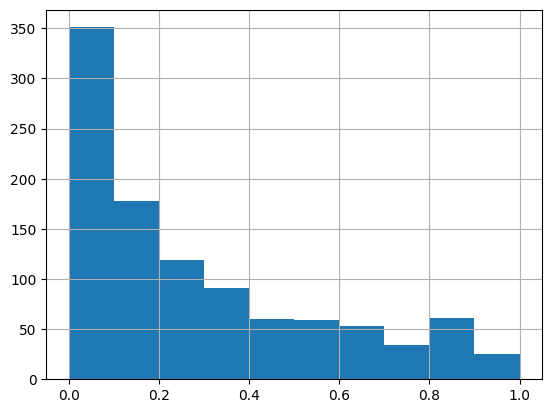

In [ ]:
t = 0.3

(table['image_level_cancer_logits'] >= t).value_counts()

image_level_cancer_logits
False    648
True     383
Name: count, dtype: int64

In [ ]:
(table['PRI-MUS'] >= 3).value_counts()

PRI-MUS
False    679
True     352
Name: count, dtype: int64

In [ ]:
table

,center,patient_id,isBiopsy,isFusionVu,hasFusionVuOverlay,bimg_path,cine_number,length,heightMm,heightPixel,...,average_needle_heatmap_value,image_level_cancer_logits,involvement,err,cspca_model_err,cspca_primus_err,primus_pred,cspca_label,primus_positive,cspca_positive
core_id,,,,,,,,,,,,,,,,,,,,,
UA-003-005,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,0.721861,0.517930,0.50,0.221861,0.517930,1.0,True,False,True,False
UA-003-006,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,962.0,...,0.352760,0.421996,0.30,0.052760,0.421996,1.0,True,False,True,False
UA-003-007,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,7.0,60.0,28.0,962.0,...,0.580911,0.490570,0.30,0.280911,0.509430,0.0,True,True,True,True
UA-003-008,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,0.531472,0.388130,0.40,0.131472,0.388130,1.0,True,False,True,False
UA-003-009,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,0.762613,0.512172,0.50,0.262613,0.512172,1.0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UA-160-008,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,0.184895,0.167181,0.45,0.265105,0.167181,1.0,True,False,True,False
UA-160-009,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,0.079140,0.070105,0.05,0.029139,0.070105,0.2,False,False,False,False
UA-160-010,UA,UA-160,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,10.0,60.0,28.0,962.0,...,0.071826,0.085328,0.35,0.278174,0.085328,0.4,False,False,False,False


In [ ]:
new_df

,score
score,NaN


In [ ]:
new_table

,image_level_cancer_logits,PRI-MUS
core_id,,
UA-003-005,0.51793,NaN
UA-003-006,0.421996,NaN
UA-003-007,0.49057,NaN
UA-003-008,0.38813,NaN
UA-003-009,0.512172,NaN
...,...,...
UA-160-009,NaN,1.0
UA-160-010,NaN,2.0
UA-160-011,NaN,1.0


In [ ]:
sns.violinplot(data=table, x='grade_group', y='model_scores')

ValueError: Could not interpret value `model_scores` for `y`. An entry with this name does not appear in `data`.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='grade_group', ylabel='average_needle_heatmap_value'>

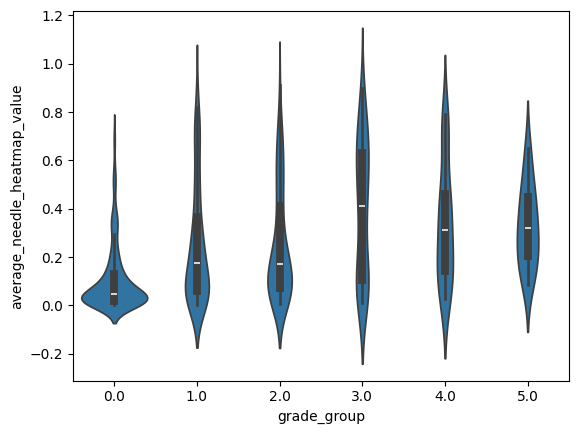

In [ ]:
sns.violinplot(x=grade, y=table['average_needle_heatmap_value'])

In [ ]:
s

In [ ]:
table.loc[table['primus_positive'] & table['cspca_positive']]

In [ ]:
table['cspca_model_err']

core_id
UA-003-005    0.517930
UA-003-006    0.421996
UA-003-007    0.509430
UA-003-008    0.388130
UA-003-009    0.512172
                ...   
UA-160-008    0.167181
UA-160-009    0.070105
UA-160-010    0.085328
UA-160-011    0.040088
UA-160-012    0.076301
Name: cspca_model_err, Length: 1031, dtype: float64

In [ ]:
table['cspca_primus_err']

core_id
UA-003-005    1.0
UA-003-006    1.0
UA-003-007    0.0
UA-003-008    1.0
UA-003-009    1.0
             ... 
UA-160-008    1.0
UA-160-009    0.2
UA-160-010    0.4
UA-160-011    0.2
UA-160-012    0.4
Name: cspca_primus_err, Length: 1031, dtype: float64

In [ ]:
table['PRI-MUS']

core_id
UA-003-005    5.0
UA-003-006    5.0
UA-003-007    5.0
UA-003-008    5.0
UA-003-009    5.0
             ... 
UA-160-008    5.0
UA-160-009    1.0
UA-160-010    2.0
UA-160-011    1.0
UA-160-012    2.0
Name: PRI-MUS, Length: 1031, dtype: float64

In [ ]:
table['grade_group']

core_id
UA-003-005    1.0
UA-003-006    2.0
UA-003-007    3.0
UA-003-008    1.0
UA-003-009    1.0
             ... 
UA-160-008    2.0
UA-160-009    1.0
UA-160-010    2.0
UA-160-011    1.0
UA-160-012    2.0
Name: grade_group, Length: 1031, dtype: float64

In [ ]:
table.loc[table['grade_group'] > 0].err.mean()

0.2232682946506925

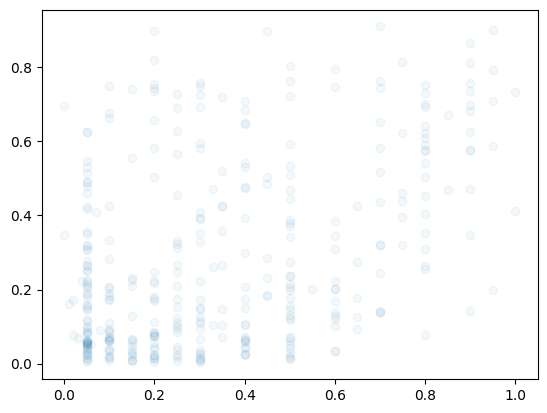

In [ ]:

plt.scatter(table.loc[table['grade_group'] > 0,'involvement'], table.loc[table['grade_group'] > 0, 'average_needle_heatmap_value'], alpha=0.05)

In [ ]:
score

0.7452093396115649

0.7737509549274255

In [ ]:
table['clinically_significant'] = (table['grade_group'] > 2).astype(int)

table.groupby('patient_id')['clinically_significant'].sum().value_counts()

clinically_significant
0     52
1      6
2      4
5      4
11     3
7      2
6      2
3      1
9      1
12     1
Name: count, dtype: int64

In [ ]:
table

,center,case,isBiopsy,isFusionVu,hasFusionVuOverlay,bimg_path,cine_number,length,heightMm,heightPixel,...,Inflamm,HGPIN,Atypia,PATH Notes,PATH ID,case_path,age,psa,study_arm,clinically_significant
core_id,,,,,,,,,,,,,,,,,,,,,
UA-003-005,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,962.0,...,False,False,False,RB; Overall % Pattern 4 is 15.,1.1,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0
UA-003-006,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,962.0,...,False,False,False,RB,1.2,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0
UA-003-007,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,7.0,60.0,28.0,962.0,...,False,False,False,RB,1.3,UA-003,64.0,11.5,Arm3-MicroUS-MRI,1
UA-003-008,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,962.0,...,False,False,False,RM to B,2.1,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0
UA-003-009,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,962.0,...,False,False,False,RM to B,2.2,UA-003,64.0,11.5,Arm3-MicroUS-MRI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UA-167-014,UA,UA-167,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,14.0,60.0,28.0,962.0,...,False,False,False,NaN,RMA,UA-167,60.0,7.9,Arm1-MicroUS-Only,0
UA-167-015,UA,UA-167,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,15.0,60.0,28.0,962.0,...,False,False,False,NaN,RLM,UA-167,60.0,7.9,Arm1-MicroUS-Only,0
UA-167-016,UA,UA-167,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,16.0,60.0,28.0,962.0,...,False,False,False,NaN,RMM,UA-167,60.0,7.9,Arm1-MicroUS-Only,0


In [ ]:
table['PI-RADS'].value_counts(sort=False, normalize=True)

PI-RADS
5.0    0.163324
2.0    0.681948
4.0    0.103152
3.0    0.017192
1.0    0.034384
Name: proportion, dtype: float64

In [ ]:
table['PRI-MUS'].value_counts(sort=False, normalize=True)

PRI-MUS
5.0    0.177578
2.0    0.582063
3.0    0.106726
4.0    0.057399
1.0    0.076233
Name: proportion, dtype: float64

In [ ]:
import pandas as pd

threshold = 0
grade_greater_than = 1

table = pd.read_csv('/h/pwilson/projects/medAI/data/OPTIMUM/processed/UA_annotated_needles/mined_path_reports.csv')
table = table.loc[~table['Diagnosis'].isna()]
table = table.loc[(table['Diagnosis'] == "Benign") | (table['% Cancer'] > threshold)]
table['GG'].loc[table['GG'].isna()] = 0
ai_outputs_table = pd.read_csv('/h/pwilson/projects/medAI/projects/prostnfound/logs/test/optimum_test/16607523/metrics_by_core.csv', index_col=0)
table.set_index('cine_id', inplace=True)
ai_outputs_table.set_index('core_id', inplace=True)
table = table.join(ai_outputs_table.loc[:, ['average_needle_heatmap_value']], how='left')
table = table.loc[~table['average_needle_heatmap_value'].isna()]


# comparing heatmap values to the PI-RADS score
table = table.loc[~table['PI-RADS'].isna()]
table['PI-RADS'] = table['PI-RADS'].astype(int)
table = table.loc[table['PI-RADS'].isin([1, 2, 3, 4, 5])]
table = table.loc[~table['PRI-MUS'].isna()]
table = table.loc[table['PRI-MUS'].isin(['1', '2', '3', '4', '5'])]
table['PRI-MUS'] = table['PRI-MUS'].astype(int)
table['average_needle_heatmap_value'] = table['average_needle_heatmap_value'].astype(float)

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
print(f"Comparing heatmap values to the PI-RADS score")
print(f"{len(table)} cores")
print("Model:", roc_auc_score(table['GG'] > grade_greater_than, table['average_needle_heatmap_value']))
print("PI-RADS:", roc_auc_score(table['GG'] > grade_greater_than, table['PI-RADS']))
print("PRI-MUS:", roc_auc_score(table['GG'] > grade_greater_than, table['PRI-MUS']))


import pandas as pd

table = pd.read_csv('/h/pwilson/projects/medAI/data/OPTIMUM/processed/UA_annotated_needles/mined_path_reports.csv')
table = table.loc[~table['Diagnosis'].isna()]
table = table.loc[(table['Diagnosis'] == "Benign") | (table['% Cancer'] > threshold)]
table['GG'].loc[table['GG'].isna()] = 0
ai_outputs_table = pd.read_csv('/h/pwilson/projects/medAI/projects/prostnfound/logs/test/optimum_test/16607523/metrics_by_core.csv', index_col=0)
table.set_index('cine_id', inplace=True)
ai_outputs_table.set_index('core_id', inplace=True)
table = table.join(ai_outputs_table.loc[:, ['average_needle_heatmap_value']], how='left')
table = table.loc[~table['average_needle_heatmap_value'].isna()]

# comparing heatmap values to the PI-RADS score
table = table.loc[~table['PRI-MUS'].isna()]
table = table.loc[table['PRI-MUS'].isin(['1', '2', '3', '4', '5'])]
table['PRI-MUS'] = table['PRI-MUS'].astype(int)
table['average_needle_heatmap_value'] = table['average_needle_heatmap_value'].astype(float)

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
print(f"Comparing heatmap values to the PRI-MUS score")
print(f"{len(table)} cores")
print("Model:", roc_auc_score(table['GG'] > grade_greater_than, table['average_needle_heatmap_value']))
print("PRI-MUS:", roc_auc_score(table['GG'] > grade_greater_than, table['PRI-MUS']))


#table['GG'].loc[table['GG'].isna()] = 0
#print(table['PI-RADS'].value_counts())

#table = table.loc[~table['Diagnosis'].isna()]

#table_with_primus = table.loc[~table['PRI-MUS'].isna()]




#table = table.loc[~table['PI-RADS'].isna()]
#table = table.loc[~table['PRI-MUS'].isna()]
#table['PI-RADS'] = table['PI-RADS'].astype(int)
#table = table.loc[table['PRI-MUS'].isin(['1', '2', '3', '4', '5'])]
#table['PRI-MUS'] = table['PRI-MUS'].astype(int)



#table = table.loc[table['PRI-MUS'].isin(['1', '2', '3', '4', '5'])]

# table['PRI-MUS'] = table['PRI-MUS'].astype(int)

/tmp/ipykernel_24659/2637254107.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  table['GG'].loc[table['GG'].isna()] = 0


Comparing heatmap values to the PI-RADS score
308 cores
Model: 0.7663887670030716
PI-RADS: 0.83835015357613
PRI-MUS: 0.872444054409829
Comparing heatmap values to the PRI-MUS score
1028 cores
Model: 0.7063672792105773
PRI-MUS: 0.7742531495113182


/tmp/ipykernel_24659/2637254107.py:39: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  table['GG'].loc[table['GG'].isna()] = 0


In [ ]:
table.count()

center                          1041
case                            1041
isBiopsy                        1041
isFusionVu                      1041
hasFusionVuOverlay              1041
bimg_path                       1041
cine_number                     1041
length                          1041
heightMm                        1041
heightPixel                     1041
widthMm                         1041
widthPixel                      1041
createdDate                     1041
Sample ID                       1041
Cine #                          1041
PRI-MUS                         1035
PI-RADS                          317
Notes                             34
Number of Samples               1041
Core Length                     1041
Diagnosis                       1041
GG                               367
% Cancer                         365
% P4                              25
P Inv                           1041
IDC                             1041
Cribiform                       1041
I

In [ ]:
ai_outputs_table.set_index('core_id', inplace=True)

In [ ]:
ai_outputs_table

,center,patient_id,loc,grade,age_0,family_history,psa_0,pct_cancer,grade_group,average_needle_heatmap_value,average_prostate_heatmap_value,label,involvement,clinically_significant,entropy,topk_score
core_id,,,,,,,,,,,,,,,,
UA-061-007,UA,UA-061,LLM TO B 1.3,Benign,0.708861,0.0,0.188383,NaN,NaN,0.146688,0.101445,0,0.0,False,3.883522,0.243979
UA-061-011,UA,UA-061,RLA,Benign,0.708861,0.0,0.188383,NaN,NaN,0.063663,0.052151,0,0.0,False,3.618701,0.095804
UA-061-017,UA,UA-061,LLB,Benign,0.708861,0.0,0.188383,NaN,NaN,0.080334,0.077715,0,0.0,False,3.897943,0.078485
UA-061-013,UA,UA-061,RMM,Benign,0.708861,0.0,0.188383,NaN,NaN,0.008894,0.042033,0,0.0,False,3.353490,0.004959
UA-061-009,UA,UA-061,RM TO B 2.2,Benign,0.708861,0.0,0.188383,NaN,NaN,0.086122,0.075623,0,0.0,False,3.846815,0.089828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UA-150-011,UA,UA-150,RLB,Benign,0.683544,0.0,0.200942,NaN,NaN,0.092854,0.069296,0,0.0,False,3.757241,0.051761
UA-150-007,UA,UA-150,RLA,Benign,0.683544,0.0,0.200942,NaN,NaN,0.084262,0.039412,0,0.0,False,3.548014,0.021060
UA-150-004,UA,UA-150,LA-M 1.1,Benign,0.683544,0.0,0.200942,NaN,NaN,0.009053,0.027740,0,0.0,False,3.242908,0.013894


In [ ]:
table

,cine_id,center,case,isBiopsy,isFusionVu,hasFusionVuOverlay,bimg_path,cine_number,length,heightMm,...,Cribiform,Inflamm,HGPIN,Atypia,PATH Notes,PATH ID,case_path,age,psa,study_arm
4,UA-003-005,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,5.0,60.0,28.0,...,False,False,False,False,RB; Overall % Pattern 4 is 15.,1.1,UA-003,64.0,11.5,Arm3-MicroUS-MRI
5,UA-003-006,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,6.0,60.0,28.0,...,False,False,False,False,RB,1.2,UA-003,64.0,11.5,Arm3-MicroUS-MRI
6,UA-003-007,UA,UA-003,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,7.0,60.0,28.0,...,False,False,False,False,RB,1.3,UA-003,64.0,11.5,Arm3-MicroUS-MRI
7,UA-003-008,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,8.0,60.0,28.0,...,False,False,False,False,RM to B,2.1,UA-003,64.0,11.5,Arm3-MicroUS-MRI
8,UA-003-009,UA,UA-003,True,True,True,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,9.0,60.0,28.0,...,False,False,False,False,RM to B,2.2,UA-003,64.0,11.5,Arm3-MicroUS-MRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,UA-167-014,UA,UA-167,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,14.0,60.0,28.0,...,False,False,False,False,NaN,RMA,UA-167,60.0,7.9,Arm1-MicroUS-Only
1364,UA-167-015,UA,UA-167,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,15.0,60.0,28.0,...,False,False,False,False,NaN,RLM,UA-167,60.0,7.9,Arm1-MicroUS-Only
1365,UA-167-016,UA,UA-167,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,16.0,60.0,28.0,...,False,False,False,False,NaN,RMM,UA-167,60.0,7.9,Arm1-MicroUS-Only
1366,UA-167-017,UA,UA-167,True,False,False,/Users/pwilson/Library/CloudStorage/Box-Box/OP...,17.0,60.0,28.0,...,False,False,False,False,NaN,RLB,UA-167,60.0,7.9,Arm1-MicroUS-Only


In [ ]:
ai_model_outputs = pd.read_csv('/h/pwilson/projects/medAI/projects/prostnfound/logs/test/prostnfound_plus_final/optimum/metrics_by_core.csv', index_col=0)


In [ ]:
(ai_model_outputs['average_needle_heatmap_value'] - ai_model_outputs['involvement']).abs().mean()

0.1484649754298463

In [ ]:
ai_model_outputs

,center,core_id,patient_id,loc,grade,age_0,family_history,psa_0,pct_cancer,grade_group,average_needle_heatmap_value,average_prostate_heatmap_value,label,involvement,clinically_significant,entropy,topk_score,image_level_cancer_logits
0,UA,UA-061-007,UA-061,LLM TO B 1.3,Benign,0.708861,0.0,0.188383,NaN,NaN,0.168195,0.105471,0,0.0,False,7.258595,0.249011,0.126128
1,UA,UA-061-011,UA-061,RLA,Benign,0.708861,0.0,0.188383,NaN,NaN,0.026871,0.026281,0,0.0,False,7.279799,0.039497,0.039775
2,UA,UA-061-017,UA-061,LLB,Benign,0.708861,0.0,0.188383,NaN,NaN,0.040985,0.069753,0,0.0,False,7.405829,0.046721,0.063450
3,UA,UA-061-013,UA-061,RMM,Benign,0.708861,0.0,0.188383,NaN,NaN,0.010183,0.025017,0,0.0,False,7.422369,0.006279,0.015874
4,UA,UA-061-009,UA-061,RM TO B 2.2,Benign,0.708861,0.0,0.188383,NaN,NaN,0.179279,0.133015,0,0.0,False,7.319772,0.282902,0.173228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,UA,UA-150-011,UA-150,RLB,Benign,0.683544,0.0,0.200942,NaN,NaN,0.134624,0.088939,0,0.0,False,7.335490,0.177826,0.092672
1037,UA,UA-150-007,UA-150,RLA,Benign,0.683544,0.0,0.200942,NaN,NaN,0.040021,0.026219,0,0.0,False,7.419707,0.026655,0.038287
1038,UA,UA-150-004,UA-150,LA-M 1.1,Benign,0.683544,0.0,0.200942,NaN,NaN,0.028990,0.040034,0,0.0,False,7.125624,0.048762,0.036568
1039,UA,UA-150-012,UA-150,RMB,Benign,0.683544,0.0,0.200942,NaN,NaN,0.017759,0.033109,0,0.0,False,7.221108,0.008159,0.031185


In [ ]:
ai_model_outputs['involvement']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1036    0.0
1037    0.0
1038    0.0
1039    0.0
1040    0.0
Name: involvement, Length: 1041, dtype: float64

In [ ]:
ai_model_outputs['pct_cancer']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1036   NaN
1037   NaN
1038   NaN
1039   NaN
1040   NaN
Name: pct_cancer, Length: 1041, dtype: float64